# Evaluation of the python module SiPM/MPPC

### Module for testing Silicon Photo-Multipliers and Multi-Pixel Photon Counters. This python module allows users to performe noise analysis of SiPM/MPPCs: Dark Count Rate, Afterpulsing, and Crosstalk. Futhermore, the SiPM/MPPC module is capable to set SiPM arrays (MPPC) for large area detectors like Ring Imaging Cherenkov, Cherenkov Telescopes, etc. Users can simulate ring or trace shape signals based on the expected number of photons generated by the source. The estimation of the signal to noise ratios (SNR) is also available.

Author: Dr. Jesús Peña Rodríguez

Experiment: Compressed Baryonic Matter (CBM)

Bergische Universität Wuppertal

March, 2023

In [81]:
import SiPM_MPPC.sipm as sipm
import matplotlib.pylab as plt
import numpy as np

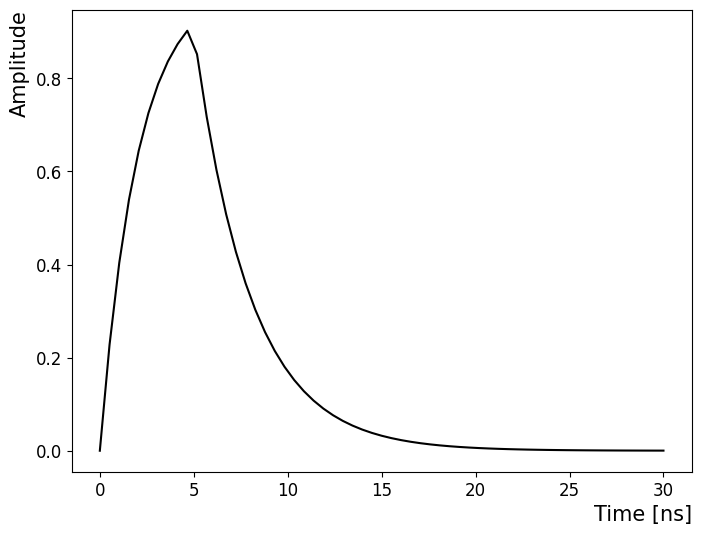

In [136]:
# Pulse shape

# Rt = 0.2e-9 # Rising time 5 
# Ft = 1e-9   # Falling time 50
# A = 1 # Pulse amplitude (spe) single photo-electron
# tm = 1e-9 # Maximum's peak time (s) 20
# R = 0.2 # Time resolution in ns 1

# # Pixel model

# DCR = 150e3  # Hz/mm2
# Pixel_size = 36.0 # mm2
# Cross = 0.25 # %
# After = 0.05 # %
# sigma = 0.1 # Pulse amplitude variance
# W = 100000 # Recording window in ns

Rt = 2e-9 # Rising time 5 
Ft = 3e-9   # Falling time 50
A = 1 # Pulse amplitude (spe) single photo-electron
tm = 5e-9 # Maximum's peak time (s) 20
R = 0.5 # Time resolution in ns 1

# Pixel model

# DCR = 125e3  # Hz/mm2
# Pixel_size = 36.0 # mm2
# Cross = 0.23 # %
# After = 0.01 # %
# sigma = 0.1 # Pulse amplitude variance
# W = 100000 # Recording window in ns

# SiPM parameters

DCR = 145e3  # Hz/mm2
Pixel_size = 36.0 # mm2
Cross = 0.25 # %
After = 0.01 # %
sigma = 0.1 # Pulse amplitude variance
W = 1000000  # Recording window in ns

# MPPC model

M = 2 # M x M array szie
N_pixel = M*M

Pulse_shape = sipm.Pulse(Rt, Ft, A, tm, R, plot=True)
Channels, time = sipm.MPPC(Pulse_shape, N_pixel, DCR, Pixel_size, Cross, After, W, R, sigma)

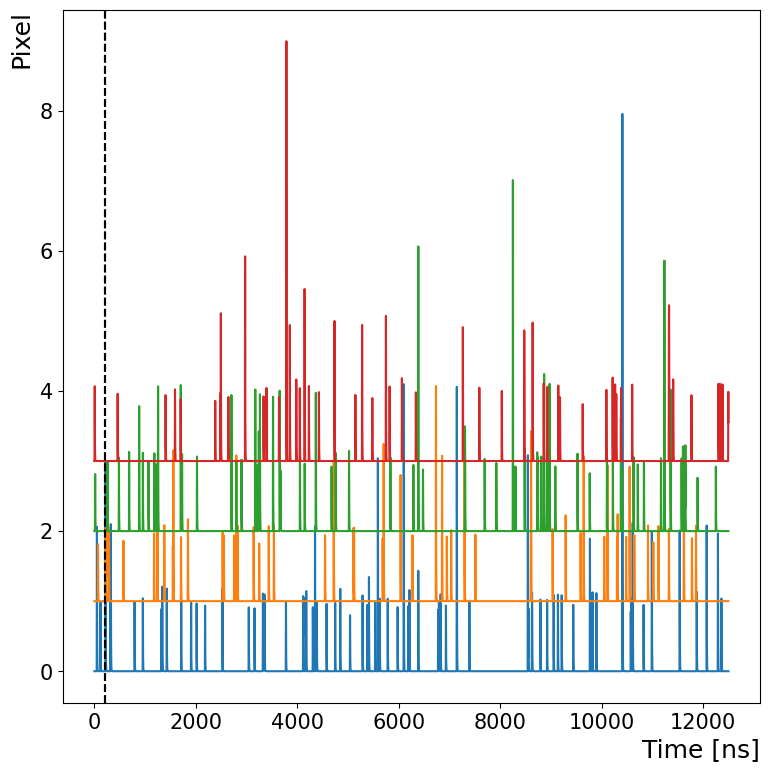

In [137]:
#%matplotlib inline

plt.figure(figsize=(9, 9))

for i in range(N_pixel):
    plt.plot(time[0:25000], Channels[i,0:25000]+i)
plt.xlabel("Time [ns]", horizontalalignment='right', x=1.0, fontsize=18)
plt.ylabel("Pixel", horizontalalignment='right', y=1.0, fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(200, color = 'k', ls='--')
plt.axvline(205, color = 'k', ls='--')

# plt.savefig("Figures/SiPM_Res.eps", bbox_inches='tight', dpi=300)
# plt.savefig('Figures/AFBR-S4N66P024M_MPPC_shortening.eps', format='eps', bbox_inches='tight', pad_inches=0)
# plt.savefig('Figures/AFBR-S4N66P024M_MPPC_trigger.eps', format='eps', bbox_inches='tight', pad_inches=0)

plt.show()

## Amplitude vs. Inter-time

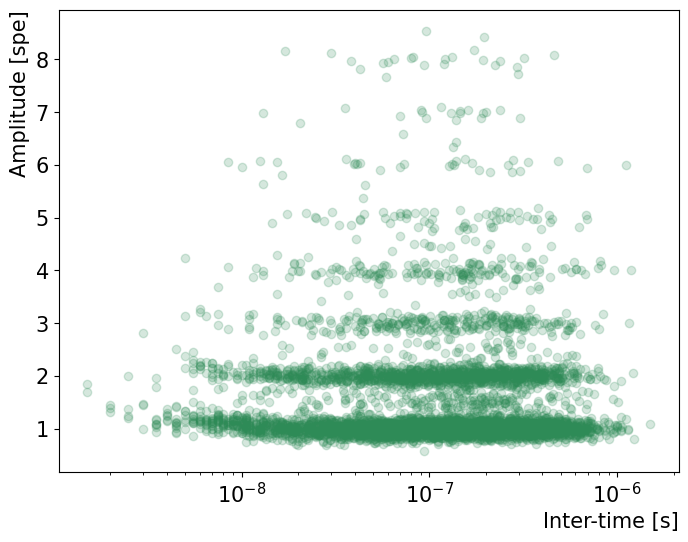

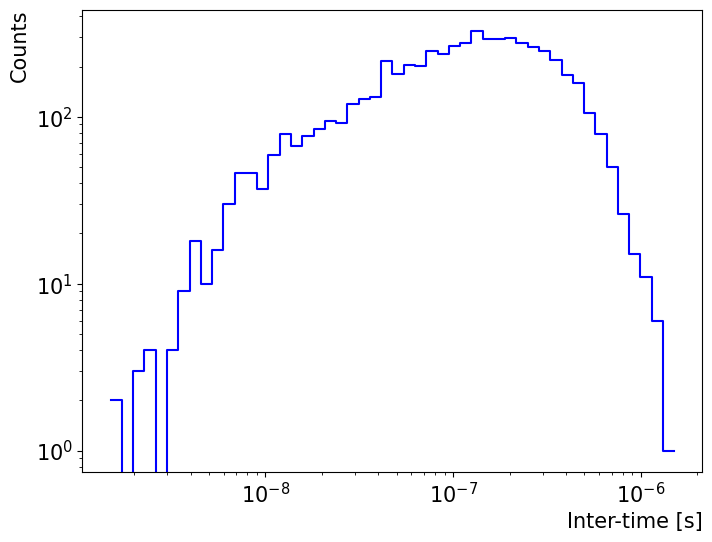

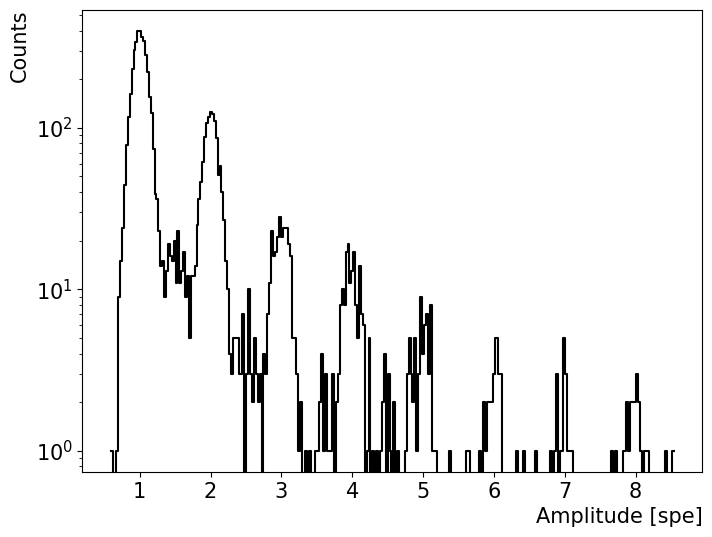

In [57]:
A, I , X, Y= sipm.Amplitude_Intertime(Channels[0,:], 1, W, R, plot=True)

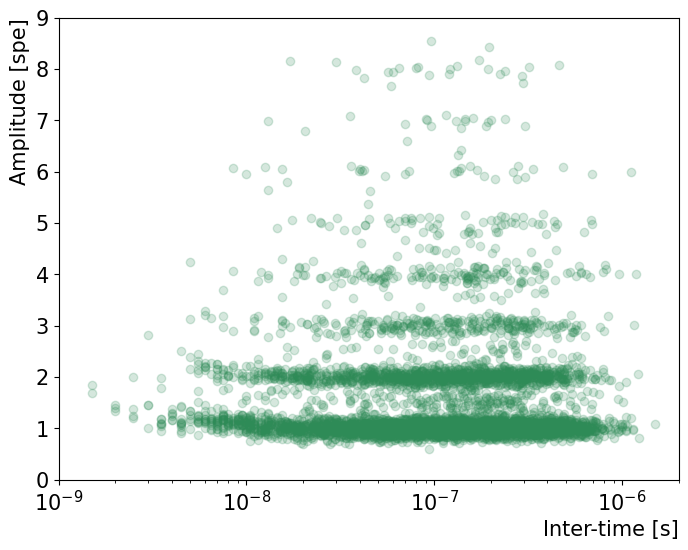

In [59]:
plt.figure(figsize=(8, 6))
plt.semilogx(I, A, ls=' ', marker='o', color='seagreen', alpha=0.2)
plt.xlabel("Inter-time [s]", horizontalalignment='right', x=1.0, fontsize=15)
plt.ylabel("Amplitude [spe]", horizontalalignment='right', y=1.0, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,9)
plt.xlim(1e-9,2e-6)

# plt.savefig('Figures/inter_time_microfc.pdf', format='pdf', bbox_inches='tight', pad_inches=0)

In [69]:
Inter_time_data = [60, 113, 28, 83, 262, 28, 9, 170, 81, 52, 73, 17, 37, 26, 135, 176, 198, 24, 124, 87, 174, 102, 40, 32, 82, 205, 4, 120, 54, 188, 154, 175, 8, 86, 95, 269, 252, 13, 12, 227, 24, 133, 300, 38, 154, 84, 162, 310, 220, 10, 18, 145, 43, 46, 299, 155, 60, 172, 314, 458, 29, 10, 12, 8, 227, 175, 31, 11, 9, 25, 49, 27, 16, 305, 13, 330, 145, 111, 51, 37, 186, 215, 285, 6, 18, 64, 55, 40, 61, 44, 140, 133, 78, 26, 355, 14, 162, 23, 20, 149, 12, 62, 65, 37, 205, 7, 30, 258, 17, 217, 51, 106, 456, 9, 39, 242, 31, 58, 47, 243, 17, 136, 19, 104, 275, 8, 207, 297, 102, 356, 109, 78, 220, 75, 13, 37, 56, 67, 75, 540, 51, 329, 213, 163, 233, 32, 484, 13, 19, 299, 159, 15, 11, 245, 75, 113, 352, 163, 15, 290, 18, 207, 15, 186, 86, 16, 76, 70, 49, 91, 29, 668, 18, 183, 255, 493, 158, 34, 30, 7, 22, 249, 163, 99, 65, 49, 17, 79, 633, 34, 225, 20, 273, 7, 321, 80, 55, 89, 347, 85, 96, 104, 48, 24, 79, 114, 154, 140, 25, 181, 9, 69, 258, 99, 138, 60, 31, 259, 43, 14, 57, 162, 247, 20, 102, 43, 110, 49, 121, 364, 206, 404, 32, 72, 69, 234, 38, 24, 207, 140, 95, 156, 138, 51, 84, 191, 199, 42, 23, 19, 53, 167, 120, 69, 11, 81, 241, 81, 35, 155, 45, 48, 520, 191, 91, 200, 129, 77, 571, 149, 151, 101, 81, 226, 474, 172, 83, 157, 786, 157, 288, 141, 283, 9, 250, 150, 123, 120, 119, 47, 43, 379, 51, 115, 13, 231, 88, 131, 65, 332, 238, 41, 128, 82, 22, 320, 158, 78, 62, 10, 77, 929, 122, 101, 190, 182, 136, 361, 44, 189, 301, 34, 186, 19, 227, 192, 13, 509, 258, 515, 16, 132, 14, 224, 58, 295, 55, 130, 79, 10, 184, 14, 786, 36, 204, 219, 55, 29, 248, 117, 43, 446, 41, 39, 241, 358, 150, 13, 46, 7, 11, 242, 80, 628, 788, 112, 228, 91, 230, 168, 476, 11, 51, 232, 108, 102, 724, 152, 377, 146, 201, 325, 19, 159, 401, 32, 80, 52, 348, 10, 128, 86, 42, 202, 63, 208, 573, 45, 369, 182, 49, 382, 75, 132, 138, 7, 111, 140, 681, 20, 11, 83, 27, 175, 164, 144, 310, 47, 378, 10, 46, 235, 26, 173, 226, 59, 11, 234, 140, 566, 71, 251, 172, 61, 7, 141, 308, 154, 31, 141, 20, 68, 263, 376, 35, 150, 880, 164, 96, 13, 286, 92, 15, 159, 7, 12, 7, 20, 52, 226, 51, 172, 19, 34, 220, 17, 320, 54, 10, 33, 172, 7, 14, 399, 123, 26, 62, 91, 103, 561, 50, 200, 51, 271, 179, 52, 108, 330, 8, 144, 11, 130, 132, 10, 101, 289, 76, 54, 87, 241, 14, 346, 390, 171, 175, 88, 29, 162, 74, 204, 168, 174, 303, 14, 14, 49, 180, 119, 218, 35, 839, 53, 312, 104, 29, 240, 162, 18, 100, 99, 14, 114, 273, 126, 36, 156, 57, 345, 448, 34, 31, 21, 194, 8, 18, 12, 80, 14, 182, 132, 487, 108, 116, 17, 541, 158, 34, 33, 99, 299, 45, 252, 176, 90, 239, 53, 366, 26, 149, 8, 15, 74, 114, 283, 702, 109, 127, 192, 125, 84, 136, 332, 23, 9, 51, 185, 320, 100, 10, 127, 45, 31, 60, 16, 128, 153, 279, 27, 103, 71, 13, 56, 39, 66, 379, 67, 13, 16, 76, 76, 269, 317, 483, 10, 180, 49, 67, 31, 359, 410, 53, 11, 56, 55, 73, 71, 116, 5, 234, 5, 91, 92, 70, 274, 212, 112, 125, 134, 289, 15, 342, 8, 144, 146, 201, 57, 33, 694, 22, 11, 69, 91, 148, 149, 123, 235, 113, 340, 42, 190, 51, 102, 81, 111, 8, 46, 109, 922, 122, 262, 158, 14, 35, 65, 138, 184, 491, 106, 172, 51, 208, 192, 28, 154, 81, 135, 29, 70, 380, 282, 92, 186, 247, 278, 90, 31, 64, 23, 41, 217, 318, 184, 38, 48, 36, 69, 291, 422, 10, 435, 31, 5, 337, 126, 28, 126, 59, 321, 17, 105, 153, 29, 18, 118, 279, 163, 19, 264, 13, 70, 33, 78, 102, 6, 220, 10, 171, 92, 91, 18, 139, 224, 219, 62, 12, 45, 56, 69, 127, 319, 375, 189, 110, 357, 12, 96, 128, 83, 71, 17, 39, 16, 104, 17, 150, 298, 163, 84, 20, 213, 226, 70, 43, 52, 70, 70, 158, 13, 41, 143, 85, 137, 40, 111, 204, 17, 34, 179, 65, 237, 8, 22, 71, 272, 56, 496, 48, 156, 6, 432, 114, 105, 11, 270, 123, 713, 20, 50, 32, 17, 113, 50, 31, 39, 30, 198, 126, 363, 178, 83, 28, 29, 211, 113, 33, 248, 224, 113, 101, 33, 6, 190, 15, 66, 32, 80, 607, 454, 7, 10, 46, 30, 173, 39, 142, 141, 206, 9, 75, 7, 32, 33, 420, 15, 9, 99, 387, 116, 196, 141, 309, 27, 23, 247, 26, 13, 53, 35, 237, 74, 23, 16, 266, 540, 19, 171, 8, 65, 110, 118, 53, 41, 61, 55, 12, 120, 36, 13, 8, 86, 116, 456, 272, 6, 96, 33, 57, 15, 68, 108, 120, 180, 213, 606, 63, 14, 25, 124, 268, 257, 61, 85, 56, 310, 64, 252, 480, 768, 9, 129, 165, 173, 102, 32, 164, 72, 10, 104, 25, 273, 435, 102, 20, 115, 115, 74, 30, 198, 235, 135, 362, 183, 67, 216, 22, 367, 128, 21, 58, 337, 12, 132, 206, 186, 79, 88, 13, 69, 9, 328, 209, 297, 67, 18, 209, 32, 44, 122, 15, 11, 371, 209, 15, 186, 35, 59, 52, 199, 50, 54, 157, 52, 378, 11, 142, 94, 63, 58, 44, 273, 222, 300, 16, 38, 43, 94, 104, 202, 558, 688, 65, 360, 12, 375, 78, 78, 18, 99, 95, 37, 100, 372, 299, 452, 30, 25, 17, 299, 68, 98, 245, 25, 19, 185, 179, 384, 14, 554, 199, 115, 647, 60, 47, 70, 243, 3, 98, 46, 17, 58, 9, 13, 178, 97, 59, 407, 64, 340, 196, 8, 103, 213, 188, 342, 25, 313, 141, 922, 204, 12, 24, 11, 224, 68, 29, 53, 131, 299, 138, 156, 24, 219, 21, 116, 149, 102, 346, 37, 278, 225, 109, 538, 231, 17, 527, 8, 28, 299, 117, 36, 338, 110, 160, 474, 166, 135, 153, 9, 76, 11, 92, 294, 7, 11, 89, 71, 114, 21, 22, 7, 383, 41, 127, 139, 23, 47, 543, 18, 105, 158, 36, 78, 146, 341, 7, 10, 386, 29, 9, 38, 49, 95, 138, 87, 20, 788, 14, 171, 15, 40, 10, 132, 49, 22, 97, 142, 98, 157, 105, 84, 7, 119, 82, 12, 229, 124, 172, 141, 604, 152, 82, 60, 61, 128, 116, 7, 47, 155, 481, 368, 173, 101, 91, 336, 61, 27, 47, 39, 7, 92, 18, 332, 184, 45, 15, 22, 128, 269, 420, 424, 195, 6, 188, 122, 249, 23, 39, 49, 97, 34, 458, 116, 68, 45, 11, 357, 113, 181, 138, 36, 410, 125, 53, 60, 218, 33, 104, 157, 274, 168, 121, 222, 37, 20, 187, 275, 117, 157, 6, 91, 9, 97, 42, 356, 81, 18, 110, 11, 20, 276, 31, 15, 579, 133, 333, 9, 154, 363, 100, 32, 323, 119, 131, 70, 178, 792, 14, 44, 52, 93, 106, 28, 694, 227, 32, 132, 138, 41, 195, 9, 10, 37, 12, 333, 25, 8, 73, 156, 123, 177, 21, 182, 71, 180, 300, 91, 31, 128, 196, 551, 58, 364, 124, 673, 39, 18, 83, 112, 6, 20, 14, 166, 507, 116, 198, 195, 31, 21, 55, 91, 344, 202, 376, 117, 10, 109, 30, 83, 31, 26, 54, 178, 193, 114, 113, 11, 250, 479, 286, 293, 299, 92, 17, 465, 99, 53, 43, 36, 321, 19, 18, 233, 138, 27, 384, 97, 12, 133, 253, 150, 19, 13, 198, 138, 325, 366, 15, 77, 32, 497, 28, 206, 31, 314, 88, 312, 8, 42, 266, 7, 9, 285, 23, 280, 86, 133, 400, 23, 19, 13, 6, 119, 18, 144, 365, 51, 10, 82, 4, 12, 425, 416, 123, 19, 293, 144, 130, 22, 593, 6, 164, 54, 341, 181, 54, 257, 17, 51, 30, 215, 187, 250, 21, 307, 13, 199, 447, 393, 172, 139, 23, 41, 12, 16, 22, 85, 575, 49, 129, 538, 209, 68, 16, 85, 14, 81, 26, 210, 5, 454, 59, 97, 88, 9, 36, 96, 193, 113, 21, 9, 170, 43, 179, 93, 130, 556, 11, 13, 112, 19, 325, 147, 130, 62, 55, 316, 222, 235, 24, 391, 41, 83, 43, 322, 27, 74, 8, 16, 27, 106, 247, 14, 334, 65, 73, 100, 21, 6, 470, 111, 32, 154, 175, 16, 14, 15, 434, 24, 709, 137, 12, 39, 115, 51, 79, 201, 177, 72, 6, 422, 24, 67, 127, 128, 32, 117, 17, 394, 319, 241, 528, 116, 211, 55, 128, 524, 481, 105, 54, 92, 40, 289, 236, 115, 100, 68, 600, 8, 25, 239, 127, 77, 55, 9, 309, 41, 208, 245, 99, 163, 9, 20, 364, 115, 28, 15, 23, 13, 152, 13, 17, 62, 564, 106, 215, 119, 358, 71, 741, 97, 50, 367, 125, 37, 282, 67, 5, 121, 65, 213, 17, 47, 7, 29, 105, 497, 8, 155, 15, 51, 512, 51, 54, 386, 78, 468, 88, 127, 83, 36, 84, 15, 456, 122, 265, 130, 446, 34, 7, 32, 11, 848, 62, 64, 54, 179, 538, 115, 131, 263, 121, 108, 72, 29, 34, 133, 729, 130, 159, 7, 230, 29, 13, 858, 209, 43, 87, 257, 106, 11, 15, 23, 309, 542, 52, 24, 312, 141, 144, 343, 69, 292, 244, 162, 231, 46, 12, 46, 215, 13, 262, 93, 11, 424, 201, 37, 108, 123, 25, 55, 150, 200, 384, 213, 83, 37, 7, 126, 180, 252, 408, 12, 414, 183, 843, 22, 242, 35, 149, 138, 392, 53, 42, 10, 280, 58, 51, 290, 243, 40, 114, 45, 55, 55, 270, 392, 91, 69, 21, 73, 467, 93, 309, 170, 269, 12, 43, 11, 334, 982, 21, 16, 47, 29, 98, 170, 265, 187, 12, 287, 170, 153, 8, 156, 267, 32, 128, 483, 299, 98, 102, 9, 22, 50, 80, 103, 136, 72, 17, 188, 359, 73, 23, 24, 171, 353, 217, 82, 77, 225, 71, 401, 162, 59, 419, 14, 112, 144, 150, 14, 332, 8, 172, 57, 28, 15, 107, 167, 236, 205, 15, 90, 48, 193, 154, 82, 6, 289, 54, 373, 11, 261, 51, 127, 43, 176, 349, 184, 13, 150, 11, 18, 190, 232, 5, 31, 172, 374, 45, 101, 166, 60, 83, 75, 533, 145, 139, 356, 10, 76, 182, 27, 141, 164, 148, 369, 73, 206, 534, 203, 188, 77, 186, 57, 118, 179, 365, 40, 726, 368, 84, 98, 224, 23, 13, 18, 193, 201, 72, 289, 92, 11, 11, 134, 9, 16, 38, 84, 131, 167, 125, 252, 9, 24, 83, 25, 83, 9, 124, 116, 346, 116, 38, 11, 129, 51, 179, 81, 161, 186, 25, 33, 20, 47, 14, 166, 70, 258, 613, 62, 127, 54, 11, 14, 366, 145, 156, 492, 74, 464, 200, 203, 11, 121, 90, 92, 117, 179, 52, 133, 124, 27, 284, 214, 277, 64, 22, 194, 59, 98, 59, 36, 16, 159, 32, 53, 139, 84, 38, 169, 17, 69, 30, 424, 243, 35, 26, 62, 87, 168, 433, 133, 191, 14, 239, 124, 6, 17, 433, 20, 967, 158, 216, 96, 510, 20, 199, 5, 22, 67, 153, 83, 231, 76, 91, 13, 258, 55, 191, 73, 17, 108, 10, 120, 15, 287, 173, 80, 78, 402, 293, 608, 301, 7, 42, 681, 334, 36, 17, 87, 16, 41, 82, 15, 105, 183, 313, 154, 278, 75, 23, 21, 138, 302, 46, 286, 14, 202, 107, 174, 28, 86, 19, 22, 73, 273, 43, 443, 103, 272, 42, 8, 42, 63, 28, 367, 80, 452, 70, 391, 128, 22, 215, 94, 228, 182, 60, 30, 39, 108, 293, 17, 37, 21, 9, 18, 187, 269, 145, 19, 118, 31, 20, 60, 280, 63, 110, 456, 81, 10, 151, 333, 16, 41, 19, 12, 163, 410, 51, 

273, 618, 189, 211, 74, 375, 33, 42, 20, 185, 45, 92, 249, 10, 127, 26, 64, 402, 238, 40, 254, 23, 578, 291, 41, 281, 133, 187, 639, 107, 65, 121, 293, 11, 24, 11, 278, 239, 11, 52, 106, 373, 190, 143, 16, 203, 68, 367, 54, 32, 62, 117, 164, 9, 15, 472, 49, 10, 12, 297, 199, 15, 32, 13, 36, 74, 29, 38, 56, 84, 72, 107, 105, 193, 187, 89, 343, 574, 41, 262, 195, 143, 287, 486, 38, 285, 53, 36, 38, 483, 374, 56, 733, 240, 191, 127, 65, 36, 25, 92, 15, 11, 269, 84, 257, 189, 80, 118, 51, 94, 10, 205, 231, 182, 62, 230, 228, 78, 141, 25, 40, 16, 131, 398, 213, 262, 70, 95, 25, 43, 116, 6, 20, 16, 122, 154, 167, 141, 161, 96, 175, 11, 75, 284, 219, 235, 82, 73, 9, 209, 112, 105, 38, 392, 15, 110, 351, 87, 220, 50, 23, 269, 164, 176, 11, 27, 184, 153, 111, 154, 154, 149, 359, 211, 333, 96, 219, 35, 25, 588, 331, 182, 26, 86, 431, 491, 76, 168, 94, 46, 337, 40, 183, 89, 28, 42, 157, 16, 15, 44, 54, 308, 571, 117, 89, 31, 115, 60, 215, 43, 71, 157, 100, 37, 36, 131, 50, 52, 9, 36, 11, 49, 61, 78, 110, 94, 9, 160, 16, 106, 693, 72, 94, 59, 405, 22, 20, 67, 110, 281, 309, 137, 17, 122, 103, 133, 5, 23, 162, 131, 52, 12, 127, 51, 124, 124, 17, 52, 25, 10, 10, 6, 19, 172, 16, 174, 17, 101, 165, 112, 86, 16, 220, 23, 76, 131, 406, 42, 82, 308, 45, 155, 16, 122, 304, 632, 11, 111, 211, 68, 98, 99, 194, 192, 363, 46, 10, 82, 470, 30, 27, 195, 511, 14, 41, 25, 319, 70, 5, 88, 138, 436, 13, 155, 4, 282, 913, 12, 130, 601, 104, 117, 9, 62, 226, 9, 13, 137, 478, 258, 91, 14, 114, 30, 231, 20, 284, 101, 40, 14, 394, 11, 12, 271, 84, 350, 86, 94, 30, 86, 111, 228, 21, 429, 13, 9, 28, 128, 111, 159, 12, 12, 151, 12, 57, 201, 17, 53, 9, 177, 116, 126, 61, 220, 124, 169, 178, 68, 101, 405, 111, 125, 111, 189, 267, 9, 31, 141, 256, 155, 92, 153, 107, 1079, 27, 32, 19, 13, 37, 57, 91, 144, 222, 133, 453, 63, 20, 40, 9, 394, 241, 360, 53, 448, 8, 68, 202, 450, 113, 647, 167, 36, 7, 12, 7, 225, 248, 114, 11, 114, 317, 561, 170, 15, 262, 51, 22, 195, 29, 37, 350, 181, 21, 208, 94, 316, 7, 225, 45, 218, 690, 73, 44, 241, 67, 25, 667, 349, 91, 316, 128, 438, 391, 56, 60, 143, 98, 48, 13, 34, 342, 43, 14, 29, 229, 215, 37, 20, 15, 358, 192, 341, 81, 37, 280, 17, 204, 169, 173, 9, 13, 136, 412, 147, 82, 338, 296, 100, 24, 100, 149, 304, 232, 168, 69, 25, 201, 21, 544, 23, 145, 60, 52, 42, 101, 61, 145, 15, 87, 11, 249, 183, 17, 14, 24, 184, 310, 8, 106, 138, 398, 190, 12, 233, 171, 219, 192, 59, 96, 52, 28, 62, 229, 26, 16, 13, 39, 213, 292, 168, 264, 198, 73, 75, 21, 13, 103, 71, 50, 11, 439, 34, 218, 138, 222, 26, 51, 29, 60, 31, 241, 267, 80, 515, 219, 37, 142, 262, 303, 61, 85, 80, 39, 383, 140, 16, 154, 70, 48, 33, 50, 72, 76, 621, 12, 227, 91, 291, 69, 197, 202, 343, 26, 136, 256, 158, 398, 129, 134, 7, 52, 11, 55, 12, 10, 20, 177, 122, 127, 268, 86, 16, 11, 73, 42, 148, 150, 19, 199, 7, 38, 68, 412, 5, 10, 87, 18, 171, 75, 443, 109, 94, 37, 316, 124, 9, 136, 384, 32, 53, 61, 190, 135, 372, 19, 42, 22, 388, 111, 15, 40, 12, 13, 580, 15, 660, 246, 27, 210, 12, 238, 77, 56, 19, 10, 164, 15, 40, 53, 54, 122, 307, 30, 192, 12, 172, 33, 47, 89, 298, 535, 97, 6, 51, 9, 165, 152, 9, 248, 350, 207, 5, 369, 58, 8, 44, 14, 13, 16, 206, 51, 568, 76, 149, 99, 759, 87, 254, 147, 62, 103, 266, 19, 543, 33, 210, 11, 223, 98, 31, 25, 15, 88, 104, 40, 9, 282, 36, 94, 145, 293, 267, 199, 13, 178, 22, 46, 52, 116, 9, 648, 13, 291, 27, 22, 29, 286, 34, 195, 8, 16, 122, 148, 46, 9, 145, 490, 29, 359, 61, 86, 13, 163, 10, 87, 124, 119, 13, 30, 146, 75, 10, 45, 407, 67, 65, 218, 56, 300, 184, 357, 7, 208, 189, 43, 150, 92, 17, 250, 261, 116, 148, 152, 94, 314, 211, 255, 74, 185, 11, 268, 49, 318, 156, 294, 68, 136, 125, 28, 236, 182, 245, 87, 43, 138, 61, 172, 145, 404, 106, 136, 42, 113, 93, 386, 189, 261, 328, 379, 12, 259, 117, 15, 71, 7, 885, 41, 13, 32, 60, 149, 257, 399, 251, 512, 334, 291, 23, 87, 19, 188, 85, 58, 112, 194, 197, 16, 164, 73, 217, 161, 203, 12, 56, 136, 325, 435, 99, 24, 9, 157, 232, 250, 48, 73, 37, 173, 133, 306, 8, 14, 11, 15, 211, 51, 444, 39, 112, 114, 23, 87, 126, 232, 156, 256, 241, 18, 22, 108, 180, 129, 190, 179, 101, 45, 37, 337, 73, 21, 52, 13, 46, 11, 222, 12, 332, 14, 129, 103, 12, 83, 59, 49, 162, 25, 211, 19, 246, 155, 389, 156, 768, 133, 14, 17, 290, 70, 413, 105, 26, 10, 8, 213, 25, 7, 16, 381, 15, 463, 463, 183, 12, 288, 253, 125, 85, 9, 26, 24, 17, 39, 66, 241, 293, 43, 88, 475, 100, 71, 190, 385, 355, 45, 15, 134, 203, 103, 542, 56, 133, 285, 73, 200, 76, 12, 49, 106, 27, 293, 388, 88, 9, 9, 86, 409, 55, 47, 207, 10, 177, 285, 157, 27, 17, 256, 347, 296, 23, 110, 26, 141, 27, 31, 317, 32, 147, 14, 196, 7, 59, 332, 257, 200, 10, 8, 11, 212, 13, 9, 95, 419, 209, 41, 71, 132, 81, 305, 142, 47, 99, 157, 443, 29, 34, 34, 178, 222, 8, 378, 44, 13, 216, 17, 16, 276, 63, 173, 119, 193, 115, 180, 85, 188, 33, 183, 161, 11, 52, 8, 334, 115, 437, 186, 61, 133, 378, 534, 132, 225, 448, 69, 77, 259, 8, 172, 28, 65, 428, 265, 94, 9, 287, 302, 207, 86, 233, 11, 12, 15, 61, 355, 66, 20, 287, 126, 86, 13, 43, 64, 14, 100, 38, 359, 235, 35, 31, 68, 417, 171, 55, 57, 56, 17, 531, 40, 306, 299, 35, 10, 8, 230, 141, 25, 5, 357, 67, 32, 82, 97, 47, 27, 38, 100, 18, 51, 87, 419, 52, 91, 55, 680, 24, 106, 10, 625, 419, 89, 295, 112, 62, 102, 64, 49, 69, 39, 580, 30, 121, 240, 398, 129, 301, 27, 11, 23, 36, 63, 310, 29, 94, 58, 201, 24, 76, 120, 436, 37, 81, 210, 29, 274, 140, 364, 523, 215, 204, 400, 319, 370, 232, 86, 33, 399, 18, 181, 111, 120, 175, 7, 65, 169, 132, 100, 230, 33, 10, 223, 100, 65, 23, 36, 185, 32, 70, 403, 412, 89, 264, 179, 42, 139, 390, 149, 70, 493, 18, 8, 84, 22, 106, 83, 214, 81, 424, 46, 298, 16, 16, 201, 362, 22, 301, 9, 24, 12, 386, 24, 50, 27, 52, 67, 42, 62, 212, 45, 40, 353, 155, 206, 27, 117, 150, 297, 273, 50, 143, 571, 8, 125, 29, 28, 156, 149, 168, 100, 15, 378, 12, 22, 94, 221, 106, 11, 10, 183, 11, 38, 10, 8, 20, 74, 71, 16, 100, 599, 67, 56, 276, 30, 265, 151, 289, 242, 23, 104, 226, 55, 96, 197, 93, 9, 180, 63, 12, 44, 139, 21, 15, 183, 101, 58, 132, 37, 41, 15, 55, 36, 146, 489, 60, 215, 257, 42, 52, 135, 20, 8, 41, 217, 289, 163, 86, 81, 92, 102, 140, 77, 367, 11, 14, 17, 8, 77, 48, 146, 127, 60, 173, 14, 152, 45, 25, 78, 10, 66, 524, 233, 43, 33, 83, 79, 594, 122, 459, 568, 23, 29, 97, 196, 95, 9, 75, 22, 61, 80, 68, 13, 413, 29, 33, 72, 40, 13, 27, 152, 174, 34, 53, 8, 16, 320, 70, 86, 43, 48, 61, 34, 48, 246, 207, 240, 26, 53, 130, 243, 14, 13, 202, 111, 28, 103, 114, 48, 227, 231, 251, 132, 78, 35, 601, 70, 153, 44, 252, 25, 73, 15, 80, 145, 17, 169, 580, 74, 62, 100, 9, 9, 34, 35, 8, 25, 196, 7, 8, 11, 188, 96, 171, 188, 383, 9, 58, 41, 22, 319, 97, 340, 208, 165, 154, 221, 329, 294, 302, 14, 91, 13, 336, 210, 248, 341, 12, 111, 21, 251, 244, 27, 216, 234, 12, 27, 89, 163, 41, 16, 10, 11, 140, 278, 234, 42, 10, 114, 150, 40, 83, 132, 127, 9, 12, 58, 396, 250, 138, 235, 79, 32, 361, 407, 131, 170, 34, 91, 17, 116, 55, 153, 17, 17, 163, 63, 36, 90, 139, 117, 119, 21, 310, 201, 12, 184, 566, 156, 10, 31, 208, 342, 294, 29, 32, 318, 63, 81, 109, 9, 186, 34, 323, 62, 59, 92, 20, 96, 146, 109, 27, 203, 46, 23, 78, 111, 12, 241, 95, 38, 18, 350, 188, 143, 124, 79, 60, 148, 82, 566, 230, 9, 119, 265, 345, 38, 73, 36, 11, 241, 134, 36, 587, 17, 193, 104, 65, 103, 102, 205, 240, 31, 43, 3, 337, 146, 231, 10, 7, 560, 45, 153, 10, 13, 163, 119, 23, 302, 11, 294, 78, 21, 168, 49, 34, 108, 69, 736, 47, 16, 59, 102, 221, 400, 9, 160, 76, 152, 28, 250, 23, 113, 587, 37, 94, 25, 22, 79, 67, 60, 42, 73, 88, 43, 342, 82, 543, 20, 99, 146, 149, 14, 20, 18, 167, 26, 106, 171, 113, 38, 13, 103, 20, 131, 120, 21, 114, 58, 149, 114, 28, 26, 1006, 173, 203, 133, 13, 8, 564, 31, 23, 424, 277, 180, 77, 243, 7, 99, 117, 22, 178, 36, 140, 300, 208, 237, 138, 8, 72, 23, 122, 330, 67, 172, 43, 125, 183, 9, 114, 179, 63, 37, 17, 18, 120, 9, 589, 184, 37, 251, 43, 62, 165, 98, 177, 442, 95, 74, 33, 60, 221, 11, 35, 14, 122, 9, 186, 304, 20, 49, 55, 27, 79, 12, 51, 78, 37, 10, 11, 486, 286, 67, 47, 174, 77, 104, 14, 169, 198, 362, 260, 248, 31, 747, 294, 156, 18, 591, 185, 117, 87, 10, 23, 325, 14, 160, 18, 79, 208, 34, 9, 131, 23, 33, 88, 30, 92, 15, 211, 33, 7, 23, 82, 62, 83, 56, 125, 131, 22, 90, 98, 34, 560, 65, 11, 149, 13, 148, 13, 454, 121, 111, 426, 61, 16, 202, 182, 324, 42, 304, 14, 9, 53, 120, 388, 162, 121, 61, 8, 8, 16, 168, 14, 93, 89, 11, 46, 52, 74, 680, 382, 344, 71, 80, 267, 13, 52, 92, 21, 114, 58, 88, 213, 25, 118, 102, 582, 255, 29, 125, 75, 81, 10, 29, 515, 243, 137, 175, 324, 45, 12, 64, 16, 199, 181, 34, 33, 15, 60, 128, 35, 192, 41, 49, 290, 75, 41, 232, 45, 78, 136, 250, 55, 46, 104, 139, 207, 28, 134, 9, 342, 137, 100, 37, 85, 349, 10, 315, 58, 250, 21, 38, 91, 21, 99, 29, 135, 275, 316, 35, 336, 16, 24, 278, 236, 66, 12, 41, 23, 119, 21, 208, 98, 196, 124, 116, 13, 14, 76, 49, 141, 139, 90, 19, 152, 21, 621, 49, 17, 29, 72, 20, 29, 292, 101, 324, 269, 323, 54, 332, 348, 13, 96, 24, 58, 19, 49, 72, 40, 587, 15, 145, 295, 73, 78, 43, 345, 232, 381, 9, 19, 208, 37, 9, 56, 37, 344, 345, 157, 35, 383, 351, 130, 147, 401, 256, 8, 120, 28, 292, 347, 291, 8, 7, 79, 35, 49, 198, 31, 203, 588, 66, 18, 16, 65, 81, 79, 27, 1020, 10, 199, 113, 9, 121, 224, 11, 9, 102, 145, 245, 229, 55, 300, 168, 225, 8, 327, 63, 81, 236, 17, 130, 127, 799, 6, 11, 198, 18, 19, 334, 27, 122, 165, 317, 346, 357, 55, 40, 576, 101, 342, 80, 16, 72, 44, 28, 12, 362, 54, 21, 263, 76, 137, 270, 95, 12, 52, 161, 18, 58, 63, 103, 354, 142, 10, 74, 48, 19, 125, 361, 342, 85, 29, 74, 357, 55, 16, 68, 54, 9, 196, 226, 330, 104, 21, 147, 216, 12, 133, 628, 250, 22, 17, 138, 302, 13, 27, 56, 63, 33, 270, 393, 31, 75, 227, 123, 14, 73, 399, 142, 21, 101, 25, 43, 38, 60, 100, 28, 67, 32, 168, 254, 27, 563, 107, 281, 121, 217, 16, 545, 116, 175, 229, 296, 529, 287, 308, 24, 59, 56, 105, 265, 276, 104, 295, 457, 53, 10, 181, 164, 34, 105, 73, 42, 62, 302, 57, 125, 150, 12, 215, 38, 48, 8, 155, 319, 319, 9, 11, 13, 150, 96, 44, 120, 292, 112, 137, 118, 18, 12, 345, 573, 172, 275, 11, 52, 8, 168, 437, 85, 10, 118, 368, 165, 206, 11, 55, 295, 261, 107, 94, 133, 30, 263, 8, 63, 16, 144, 521, 73, 234, 128, 70, 60, 314, 588, 71, 100, 373, 22, 129, 29, 76, 7, 83, 41, 467, 22, 19, 20, 63, 85, 145, 164, 10, 163, 238, 362, 53, 461, 85, 90, 198, 325, 391, 206, 101, 32, 11, 144, 65, 13, 72, 15, 82, 295, 649, 16, 51, 25, 13, 24, 84, 220, 59, 123, 179, 541, 144, 96, 60, 274, 375, 38, 529, 732, 22, 137, 105, 74, 14, 117, 169, 84, 107, 8, 78, 195, 79, 6, 321, 110, 260, 47, 24, 105, 98, 176, 112, 318, 69, 109, 167, 154, 940, 144, 79, 190, 670, 105, 221, 10, 432, 294, 27, 336, 205, 20, 225, 29, 396, 99, 129, 98, 238, 50, 82, 174, 4, 404, 305, 90, 138, 79, 173, 176, 343, 139, 307, 249, 59, 6, 33, 11, 123, 50, 103, 17, 51, 132, 8, 599, 18, 126, 34, 13, 259, 15, 32, 55, 169, 11, 668, 47, 178, 94, 71, 153, 41, 17, 153, 147, 352, 26, 67, 315, 90, 10, 427, 58, 451, 315, 9, 16, 131, 538, 34, 134, 483, 256, 68, 39, 264, 90, 38, 15, 302, 101, 88, 214, 110, 6, 223, 502, 164, 288, 46, 183, 10, 95, 255, 37, 50, 254, 41, 117, 189, 232, 154, 722, 22, 92, 38, 295, 142, 337, 174, 271, 335, 150, 154, 40, 10, 182, 74, 191, 43, 633, 14, 7, 338, 41, 91, 172, 20, 56, 38, 40, 37, 21, 22, 11, 806, 120, 40, 343, 236, 167, 98, 97, 295, 10, 197, 14, 667, 67, 21, 118, 103, 81, 215, 230, 236, 90, 401, 126, 105, 265, 11, 10, 15, 652, 43, 154, 105, 17, 109, 377, 322, 297, 188, 147, 17, 71, 25, 276, 138, 215, 25, 12, 185, 114, 10, 10, 35, 491, 139, 208, 95, 39, 85, 52, 200, 108, 18, 384, 321, 298, 123, 131, 9, 42, 195, 12, 88, 777, 7, 145, 146, 33, 171, 24, 131, 172, 24, 223, 290, 72, 114, 206, 235, 88, 32, 106, 20, 22, 125, 78, 287, 346, 55, 67, 28, 258, 64, 46, 800, 18, 12, 5, 36, 32, 89, 79, 18, 134, 10, 201, 19, 339, 132, 214, 437, 103, 156, 20, 10, 45, 586, 7, 493, 144, 10, 129, 304, 156, 152, 234, 159, 18, 32, 38, 61, 13, 116, 472, 228, 12, 152, 11, 20, 86, 445, 53, 13, 39, 26, 323, 152, 9, 211, 96, 227, 50, 11, 12, 375, 322, 111, 51, 12, 503, 89, 112, 18, 297, 230, 36, 115, 27, 61, 128, 32, 32, 320, 10, 35, 6, 68, 61, 13, 42, 46, 27, 11, 308, 97, 60, 162, 224, 16, 8, 259, 58, 377, 187, 252, 7, 140, 12, 122, 97, 15, 10, 142, 29, 20, 73, 56, 124, 46, 74, 246, 36, 375, 103, 10, 34, 35, 18, 26, 247, 16, 67, 32, 62, 534, 118, 8, 491, 70, 44, 196, 14, 9, 92, 92, 345, 36, 423, 264, 56, 374, 63, 227, 54, 332, 39, 10, 125, 356, 29, 10, 87, 250, 572, 172, 48, 202, 378, 37, 113, 200, 102, 111, 46, 102, 7, 258, 8, 49, 16, 110, 163, 39, 412, 95, 95, 816, 58, 28, 209, 11, 83, 191, 103, 73, 69, 52, 52, 192, 635, 64, 139, 97, 43, 37, 110, 41, 19, 151, 18, 399, 146, 306, 207, 7, 268, 36, 21, 55, 127, 267, 289, 11, 359, 37, 20, 85, 241, 160, 175, 67, 15, 86, 10, 8, 310, 126, 118, 8, 29, 87, 162, 405, 221, 76, 101, 15, 460, 74, 343, 87, 50, 276, 19, 184, 175, 229, 20, 54, 721, 183, 10, 90, 948, 186, 185, 77, 328, 274, 170, 18, 216, 57, 23, 262, 405, 7, 220, 6, 173, 9, 21, 162, 135, 93, 357, 229, 37, 63, 210, 12, 176, 566, 205, 181, 41, 256, 130, 17, 146, 30, 30, 17, 278, 19, 55, 154, 270, 406, 110, 51, 30, 185, 426, 386, 242, 16, 86, 89, 198, 93, 14, 312, 105, 35, 9, 165, 179, 161, 128, 74, 81, 161, 151, 10, 465, 758, 169, 83, 13, 146, 180, 56, 68, 60, 721, 242, 46, 310, 128, 169, 196, 179, 31, 311, 10, 33, 116, 14, 380, 24, 145, 108, 495, 260, 64, 132, 81, 246, 455, 53, 76, 321, 168, 20, 8, 581, 62, 108, 116, 330, 234, 151, 287, 6, 21, 269, 285, 70, 15, 14, 123, 33, 80, 296, 34, 319, 66, 550, 163, 151, 30, 56, 205, 37, 138, 108, 168, 162, 22, 55, 9, 41, 19, 7, 182, 132, 15, 12, 9, 338, 55, 12, 57, 77, 456, 116, 316, 32, 75, 182, 10, 66, 211, 255, 352, 12, 36, 9, 163, 75, 17, 429, 350, 361, 45, 64, 132, 247, 466, 87, 257, 321, 12, 7, 8, 31, 159, 9, 178, 377, 288, 131, 330, 7, 186, 42, 254, 261, 15, 264, 10, 132, 197, 35, 325, 15, 16, 8, 213, 12, 116, 166, 302, 10, 42, 274, 33, 295, 93, 145, 155, 16, 140, 39, 280, 43, 423, 9, 103, 31, 108, 284, 9, 42, 42, 159, 245, 99, 84, 226, 194, 466, 9, 295, 105, 350, 19, 130, 338, 254, 9, 14, 13, 39, 11, 138, 413, 236, 726, 118, 392, 468, 51, 26, 41, 339, 8, 24, 115, 80, 43, 39, 12, 375, 10, 17, 8, 11, 92, 10, 119, 27, 92, 99, 55, 108, 130, 11, 36, 46, 10, 120, 123, 240, 189, 47, 99, 171, 105, 109, 896, 78, 30, 175, 276, 179, 85, 28, 20, 369, 172, 85, 50, 610, 188, 29, 126, 35, 250, 52, 157, 24, 235, 127, 11, 106, 337, 15, 270, 218, 232, 270, 266, 37, 501, 58, 142, 270, 531, 125, 47, 313, 104, 11, 51, 78, 32, 231, 177, 185, 361, 356, 174, 232, 141, 301, 295, 13, 171, 135, 448, 10, 42, 27, 384, 88, 186, 124, 122, 122, 50, 236, 17, 212, 270, 9, 130, 54, 13, 28, 21, 78, 40, 174, 272, 148, 11, 155, 76, 42, 350, 217, 74, 215, 46, 93, 90, 27, 25, 296, 15, 80, 15, 279, 170, 207, 132, 156, 161, 87, 34, 97, 110, 436, 319, 393, 598, 84, 9, 95, 51, 55, 184, 772, 558, 14, 16, 12, 38, 36, 159, 162, 358, 92, 128, 82, 657, 234, 120, 290, 106, 13, 7, 12, 66, 51, 53, 61, 147, 155, 219, 193, 39, 432, 59, 9, 18, 298, 51, 21, 625, 23, 216, 59, 134, 467, 134, 29, 207, 40, 180, 68, 607, 99, 50, 410, 59, 8, 28, 19, 13, 10, 36, 105, 7, 488, 745, 89, 197, 24, 112, 46, 50, 57, 252, 43, 295, 27, 468, 154, 66, 168, 64, 91, 245, 8, 225, 181, 296, 245, 28, 414, 528, 14, 115, 221, 15, 44, 10, 333, 7, 7, 9, 221, 116, 371, 796, 51, 265, 256, 202, 226, 60, 27, 77, 441, 72, 72, 192, 525, 5, 20, 44, 116, 338, 12, 93, 300, 191, 129, 148, 294, 42, 128, 244, 87, 257, 92, 835, 232, 16, 656, 508, 14, 12, 110, 92, 41, 9, 169, 515, 89, 63, 60, 45, 30, 216, 75, 735, 11, 75, 94, 13, 195, 11, 142, 139, 7, 67, 378, 293, 129, 21, 16, 565, 16, 763, 39, 16, 10, 47, 244, 332, 8, 55, 487, 631, 21, 16, 76, 184, 130, 140, 8, 138, 350, 49, 649, 133, 13, 40, 16, 33, 11, 388, 13, 60, 216, 

165, 82, 188, 8, 73, 16, 125, 144, 234, 144, 52, 75, 16, 185, 112, 91, 6, 17, 247, 124, 82, 80, 9, 148, 39, 446, 200, 200, 495, 349, 28, 34, 166, 8, 307, 438, 93, 166, 119, 62, 11, 239, 19, 135, 602, 100, 17, 224, 30, 57, 19, 423, 400, 217, 20, 360, 65, 170, 11, 108, 31, 469, 98, 376, 180, 270, 84, 295, 195, 263, 168, 9, 137, 30, 7, 47, 235, 172, 115, 111, 17, 31, 133, 290, 12, 41, 23, 96, 152, 255, 146, 489, 386, 198, 249, 26, 158, 63, 159, 96, 123, 175, 282, 312, 82, 401, 47, 274, 489, 136, 195, 88, 93, 153, 50, 188, 413, 9, 83, 33, 29, 27, 24, 12, 11, 106, 21, 12, 250, 107, 173, 19, 390, 90, 13, 177, 325, 78, 149, 235, 177, 285, 95, 166, 206, 61, 11, 55, 245, 10, 168, 36, 77, 44, 481, 21, 247, 16, 124, 121, 17, 33, 84, 27, 13, 11, 68, 24, 15, 61, 12, 14, 37, 39, 42, 177, 26, 43, 117, 49, 82, 550, 60, 265, 22, 16, 16, 160, 219, 122, 196, 259, 218, 73, 34, 8, 20, 137, 11, 59, 187, 278, 761, 101, 383, 188, 396, 251, 45, 14, 55, 206, 120, 240, 368, 9, 52, 25, 73, 18, 189, 402, 60, 25, 198, 174, 104, 276, 55, 142, 107, 49, 24, 12, 358, 155, 13, 65, 87, 28, 544, 40, 58, 11, 11, 94, 10, 60, 228, 279, 156, 45, 142, 195, 32, 96, 52, 76, 48, 207, 535, 26, 103, 127, 246, 491, 51, 429, 93, 144, 162, 268, 13, 14, 807, 205, 51, 36, 65, 217, 58, 192, 345, 16, 98, 188, 104, 68, 17, 63, 157, 73, 255, 464, 356, 144, 33, 8, 46, 199, 9, 8, 29, 28, 298, 8, 131, 13, 40, 88, 116, 323, 205, 35, 578, 175, 314, 42, 8, 114, 350, 27, 130, 17, 112, 133, 52, 67, 76, 15, 63, 412, 19, 293, 29, 185, 27, 497, 27, 203, 19, 67, 106, 10, 86, 324, 72, 118, 141, 56, 30, 201, 98, 300, 151, 19, 333, 93, 89, 42, 9, 162, 13, 35, 270, 355, 159, 242, 115, 42, 6, 66, 285, 125, 12, 132, 172, 596, 68, 39, 16, 85, 537, 60, 67, 147, 301, 21, 7, 213, 309, 29, 194, 172, 18, 39, 12, 159, 87, 162, 327, 333, 16, 40, 14, 42, 83, 274, 280, 114, 129, 63, 127, 454, 193, 131, 147, 5, 465, 158, 153, 18, 68, 50, 434, 19, 434, 132, 37, 42, 213, 251, 19, 225, 17, 147, 185, 128, 81, 22, 157, 79, 225, 226, 152, 18, 68, 81, 283, 57, 54, 10, 420, 12, 268, 116, 550, 31, 75, 99, 62, 12, 73, 90, 72, 558, 198, 38, 26, 46, 34, 37, 67, 72, 302, 35, 190, 13, 119, 242, 162, 508, 189, 165, 28, 248, 120, 42, 269, 11, 9, 213, 122, 45, 65, 14, 13, 109, 44, 276, 12, 10, 72, 157, 198, 64, 44, 53, 54, 10, 56, 351, 14, 142, 29, 41, 121, 13, 169, 230, 49, 45, 85, 115, 303, 135, 216, 238, 272, 51, 717, 47, 327, 31, 179, 116, 134, 9, 90, 66, 12, 40, 224, 164, 18, 244, 147, 96, 23, 331, 7, 26, 24, 100, 9, 115, 240, 108, 26, 329, 250, 77, 235, 25, 11, 34, 74, 119, 168, 190, 11, 14, 20, 332, 44, 260, 150, 192, 16, 83, 163, 31, 11, 403, 59, 397, 203, 477, 26, 27, 22, 333, 22, 12, 478, 73, 26, 675, 10, 121, 123, 44, 97, 319, 72, 81, 604, 515, 39, 382, 12, 45, 157, 148, 9, 64, 67, 19, 151, 265, 8, 205, 229, 12, 281, 143, 34, 11, 51, 54, 99, 8, 136, 14, 181, 12, 178, 172, 43, 412, 144, 61, 678, 627, 7, 17, 78, 222, 8, 175, 191, 285, 160, 24, 71, 929, 15, 19, 62, 223, 447, 157, 186, 156, 194, 155, 175, 117, 215, 9, 275, 32, 19, 165, 268, 6, 63, 49, 35, 179, 477, 110, 230, 8, 152, 115, 383, 291, 161, 54, 203, 355, 173, 667, 97, 10, 44, 55, 322, 113, 15, 22, 790, 110, 74, 11, 201, 813, 43, 70, 289, 137, 144, 88, 153, 698, 22, 761, 74, 86, 94, 52, 213, 48, 61, 139, 196, 88, 184, 76, 14, 12, 215, 115, 11, 9, 485, 10, 33, 93, 15, 163, 321, 212, 16, 377, 148, 59, 232, 273, 96, 98, 125, 198, 12, 292, 11, 21, 8, 518, 154, 47, 100, 327, 117, 253, 77, 230, 75, 345, 71, 19, 416, 29, 91, 167, 14, 421, 65, 12, 255, 63, 181, 256, 142, 9, 10, 36, 191, 89, 569, 14, 469, 98, 267, 669, 93, 55, 77, 434, 22, 320, 11, 36, 200, 97, 44, 27, 12, 70, 174, 32, 192, 11, 28, 157, 61, 498, 522, 54, 216, 132, 42, 83, 118, 79, 140, 54, 435, 406, 495, 275, 79, 38, 478, 80, 21, 14, 4, 23, 164, 108, 232, 179, 164, 201, 290, 111, 146, 70, 596, 95, 22, 444, 74, 77, 8, 11, 120, 70, 128, 44, 51, 70, 51, 37, 10, 237, 224, 4, 21, 108, 26, 164, 63, 12, 68, 78, 298, 83, 67, 94, 374, 33, 264, 32, 28, 24, 145, 67, 206, 56, 146, 7, 201, 168, 94, 220, 179, 211, 15, 538, 50, 555, 130, 187, 528, 29, 258, 228, 36, 57, 342, 47, 84, 138, 144, 20, 33, 313, 308, 48, 131, 232, 174, 18, 132, 16, 231, 80, 167, 97, 27, 397, 330, 59, 350, 30, 126, 211, 34, 10, 93, 37, 258, 20, 85, 189, 12, 175, 81, 303, 11, 505, 321, 51, 48, 729, 117, 89, 154, 7, 72, 18, 37, 754, 29, 91, 13, 111, 336, 7, 13, 22, 355, 222, 21, 8, 19, 107, 485, 53, 21, 9, 197, 157, 127, 27, 61, 11, 426, 127, 265, 313, 96, 57, 32, 142, 186, 56, 109, 297, 28, 70, 9, 191, 18, 204, 19, 140, 52, 129, 149, 193, 112, 305, 127, 17, 8, 26, 300, 113, 144, 8, 109, 18, 10, 35, 38, 100, 21, 303, 10, 32, 141, 21, 191, 43, 27, 27, 339, 289, 19, 247, 22, 92, 162, 4, 544, 73, 108, 7, 61, 10, 240, 267, 86, 40, 58, 5, 257, 15, 7, 33, 277, 433, 413, 285, 80, 54, 44, 119, 214, 17, 194, 8, 11, 21, 186, 10, 104, 42, 112, 135, 149, 39, 224, 81, 480, 771, 26, 8, 159, 234, 296, 120, 6, 182, 63, 69, 152, 42, 89, 171, 18, 291, 78, 569, 283, 80, 82, 108, 136, 338, 68, 141, 212, 184, 929, 235, 245, 103, 55, 268, 20, 7, 21, 60, 259, 58, 13, 210, 166, 247, 75, 470, 79, 169, 8, 8, 133, 188, 147, 55, 180, 95, 45, 352, 38, 268, 556, 187, 261, 118, 39, 14, 33, 331, 215, 246, 107, 302, 13, 15, 9, 91, 54, 379, 230, 227, 59, 15, 217, 237, 25, 397, 163, 97, 84, 308, 10, 120, 168, 118, 261, 542, 41, 108, 665, 312, 9, 22, 244, 66, 165, 8, 273, 498, 58, 177, 188, 184, 186, 434, 13, 208, 130, 52, 580, 7, 153, 21, 141, 54, 20, 13, 37, 169, 15, 11, 29, 10, 177, 9, 12, 306, 129, 39, 41, 21, 13, 331, 31, 54, 223, 703, 27, 16, 131, 120, 18, 72, 315, 128, 333, 210, 62, 166, 16, 21, 19, 43, 118, 582, 351, 20, 50, 461, 22, 48, 27, 336, 23, 136, 30, 109, 185, 135, 378, 79, 107, 224, 32, 408, 303, 114, 57, 42, 12, 8, 29, 299, 12, 178, 386, 214, 288, 83, 35, 33, 17, 447, 523, 10, 196, 134, 123, 8, 307, 14, 71, 363, 10, 133, 125, 165, 181, 157, 158, 13, 87, 17, 9, 48, 390, 73, 24, 367, 27, 212, 77, 92, 52, 92, 264, 7, 188, 118, 72, 91, 219, 144, 129, 21, 109, 9, 241, 243, 19, 68, 139, 406, 336, 97, 347, 6, 143, 31, 9, 97, 16, 262, 109, 10, 94, 279, 142, 77, 291, 101, 10, 72, 29, 303, 189, 18, 253, 217, 307, 147, 292, 69, 13, 114, 105, 118, 263, 33, 238, 23, 318, 135, 120, 219, 162, 25, 50, 22, 193, 301, 106, 505, 7, 319, 45, 304, 73, 15, 372, 157, 103, 41, 91, 15, 101, 128, 445, 34, 80, 133, 239, 25, 203, 353, 18, 61, 95, 31, 162, 61, 44, 351, 49, 11, 99, 43, 84, 29, 300, 55, 190, 804, 258, 83, 52, 11, 48, 266, 54, 53, 122, 485, 205, 182, 230, 10, 411, 238, 14, 67, 65, 25, 113, 121, 105, 12, 96, 51, 305, 245, 13, 54, 9, 8, 162, 248, 12, 20, 500, 13, 86, 457, 95, 8, 201, 22, 70, 42, 83, 93, 35, 115, 118, 49, 74, 160, 242, 224, 129, 89, 66, 23, 127, 20, 8, 70, 8, 46, 204, 476, 97, 100, 1244, 455, 25, 272, 128, 360, 132, 50, 200, 27, 39, 231, 11, 91, 119, 30, 468, 116, 119, 484, 11, 85, 102, 40, 11, 73, 74, 119, 458, 9, 483, 22, 14, 12, 143, 15, 22, 8, 188, 92, 71, 52, 283, 7, 202, 32, 75, 91, 26, 16, 85, 227, 699, 16, 23, 9, 21, 99, 13, 102, 129, 110, 119, 13, 11, 6, 69, 59, 12, 56, 106, 43, 99, 155, 55, 12, 73, 8, 127, 84, 18, 18, 49, 140, 222, 45, 184, 39, 81, 127, 445, 31, 51, 37, 17, 54, 450, 180, 32, 71, 21, 105, 134, 13, 17, 275, 460, 163, 15, 56, 14, 163, 209, 164, 448, 148, 70, 8, 31, 414, 16, 131, 102, 44, 358, 13, 44, 21, 7, 92, 427, 247, 48, 17, 295, 143, 101, 114, 15, 19, 140, 232, 57, 624, 94, 81, 92, 184, 186, 70, 90, 83, 85, 16, 211, 305, 10, 90, 116, 274, 130, 10, 12, 29, 10, 406, 152, 240, 361, 240, 43, 165, 9, 10, 14, 344, 170, 78, 112, 15, 55, 73, 531, 225, 89, 132, 59, 126, 182, 39, 19, 139, 152, 165, 100, 25, 365, 10, 7, 36, 101, 171, 53, 94, 35, 45, 82, 88, 101, 22, 82, 16, 98, 59, 82, 185, 8, 133, 246, 15, 343, 5, 401, 200, 10, 100, 407, 36, 418, 37, 671, 59, 130, 19, 290, 127, 12, 70, 100, 84, 66, 152, 335, 13, 26, 515, 71, 12, 13, 132, 135, 199, 248, 219, 122, 142, 10, 100, 334, 48, 43, 70, 15, 290, 136, 116, 557, 11, 240, 222, 383, 269, 56, 54, 40, 67, 27, 9, 17, 92, 226, 134, 43, 98, 9, 478, 254, 425, 142, 53, 175, 145, 251, 352, 346, 170, 31, 140, 76, 55, 122, 241, 154, 21, 32, 14, 82, 21, 40, 66, 12, 21, 38, 168, 35, 22, 26, 10, 176, 22, 72, 142, 215, 70, 82, 9, 12, 84, 53, 13, 15, 167, 97, 171, 8, 233, 130, 8, 83, 258, 6, 323, 416, 91, 20, 85, 18, 44, 239, 354, 12, 174, 55, 31, 327, 66, 98, 430, 219, 133, 36, 109, 290, 29, 79, 9, 31, 96, 310, 108, 757, 86, 19, 328, 12, 58, 868, 177, 139, 66, 27, 540, 19, 467, 63, 94, 17, 93, 771, 78, 152, 150, 172, 184, 91, 435, 23, 271, 246, 116, 12, 104, 90, 240, 12, 137, 143, 110, 6, 344, 8, 53, 40, 90, 38, 43, 442, 38, 63, 187, 61, 33, 83, 34, 913, 136, 130, 678, 120, 60, 109, 48, 96, 227, 416, 216, 8, 131, 68, 374, 47, 123, 10, 26, 108, 48, 466, 125, 67, 127, 168, 9, 176, 20, 46, 60, 738, 166, 94, 132, 10, 59, 602, 273, 114, 129, 93, 29, 128, 10, 601, 10, 60, 17, 117, 162, 309, 165, 26, 427, 49, 10, 102, 154, 20, 20, 9, 224, 122, 35, 244, 120, 37, 69, 11, 380, 115, 132, 248, 84, 35, 185, 12, 72, 71, 398, 791, 73, 80, 50, 42, 200, 16, 190, 226, 87, 286, 47, 127, 14, 211, 574, 194, 9, 340, 467, 21, 373, 27, 74, 50, 251, 113, 185, 463, 29, 270, 30, 49, 209, 20, 15, 504, 73, 121, 199, 99, 117, 58, 431, 108, 271, 12, 319, 10, 337, 8, 54, 50, 77, 106, 80, 12, 396, 418, 9, 72, 485, 24, 529, 34, 48, 81, 661, 84, 222, 41, 164, 385, 201, 114, 14, 12, 72, 122, 170, 134, 127, 91, 23, 51, 102, 345, 53, 126, 133, 9, 5, 84, 170, 16, 90, 144, 27, 246, 81, 34, 96, 433, 227, 168, 8, 177, 17, 39, 35, 174, 10, 165, 83, 124, 116, 153, 36, 83, 14, 17, 114, 407, 221, 185, 277, 181, 356, 43, 28, 256, 166, 130, 182, 198, 92, 287, 713, 140, 15, 187, 97, 212, 256, 20, 45, 10, 152, 261, 17, 280, 457, 43, 431, 123, 162, 30, 171, 20, 223, 51, 180, 174, 380, 93, 158, 148, 174, 438, 183, 93, 25, 64, 75, 233, 81, 129, 152, 9, 88, 49, 96, 133, 248, 209, 13, 122, 211, 167, 26, 118, 10, 31, 59, 44, 22, 187, 204, 130, 36, 13, 143, 313, 120, 396, 79, 21, 65, 58, 48, 22, 19, 19, 162, 9, 15, 434, 265, 250, 84, 65, 209, 28, 275, 612, 149, 42, 21, 7, 86, 44, 197, 57, 173, 11, 277, 109, 339, 9, 327, 30, 29, 137, 25, 19, 427, 156, 18, 218, 215, 182, 17, 279, 27, 352, 62, 17, 188, 110, 151, 184, 96, 42, 12, 219, 166, 12, 24, 240, 93, 239, 26, 38, 157, 143, 45, 21, 101, 180, 223, 56, 590, 139, 267, 104, 152, 210, 10, 84, 256, 194, 183, 252, 57, 289, 99, 238, 9, 11, 9, 34, 132, 499, 34, 15, 65, 23, 75, 106, 116, 320, 315, 81, 231, 12, 159, 104, 7, 301, 342, 187, 96, 8, 30, 98, 67, 26, 28, 94, 165, 8, 119, 171, 118, 180, 37, 376, 195, 116, 301, 57, 21, 24, 219, 123, 285, 340, 24, 56, 342, 116, 200, 353, 270, 44, 28, 156, 411, 199, 499, 24, 44, 70, 15, 60, 175, 90, 199, 121, 12, 19, 101, 67, 36, 216, 96, 31, 28, 188, 99, 164, 439, 264, 89, 133, 68, 27, 202, 64, 78, 774, 165, 108, 7, 188, 54, 115, 14, 393, 57, 275, 51, 21, 215, 69, 1025, 181, 142, 9, 114, 150, 141, 195, 143, 35, 60, 46, 209, 75, 155, 62, 146, 52, 17, 223, 262, 200, 84, 57, 215, 192, 343, 116, 122, 50, 83, 130, 14, 128, 491, 55, 10, 207, 193, 6, 170, 141, 244, 69, 28, 125, 10, 188, 15, 27, 39, 92, 325, 211, 109, 44, 58, 30, 21, 389, 193, 291, 20, 124, 161, 52, 18, 203, 435, 78, 10, 276, 116, 220, 140, 242, 123, 161, 43, 416, 155, 17, 27, 17, 118, 186, 370, 129, 76, 30, 366, 236, 86, 402, 244, 78, 204, 182, 8, 233, 91, 15, 18, 94, 124, 16, 317, 116, 318, 121, 45, 215, 140, 227, 123, 165, 11, 398, 34, 277, 61, 343, 114, 80, 475, 146, 329, 255, 15, 24, 145, 324, 20, 22, 17, 823, 64, 712, 269, 96, 312, 231, 36, 96, 9, 9, 20, 85, 13, 212, 194, 691, 7, 113, 310, 340, 220, 47, 85, 424, 207, 59, 123, 53, 128, 25, 197, 201, 38, 119, 66, 145, 150, 275, 58, 144, 369, 57, 25, 142, 142, 15, 123, 98, 26, 23, 153, 95, 544, 67, 77, 405, 27, 32, 35, 186, 251, 37, 415, 287, 124, 15, 222, 32, 10, 283, 11, 34, 105, 130, 346, 56, 323, 11, 235, 17, 48, 64, 180, 78, 54, 49, 196, 121, 17, 298, 26, 112, 36, 274, 714, 116, 22, 67, 101, 265, 113, 23, 319, 214, 29, 56, 380, 105, 209, 344, 56, 216, 101, 145, 90, 192, 58, 241, 339, 200, 196, 159, 13, 20, 807, 63, 125, 139, 154, 69, 28, 326, 109, 17, 18, 36, 106, 62, 12, 249, 131, 291, 56, 425, 65, 230, 142, 44, 23, 472, 291, 131, 75, 27, 336, 241, 116, 213, 199, 255, 93, 12, 19, 159, 228, 74, 153, 226, 104, 36, 691, 12, 9, 371, 93, 59, 88, 166, 556, 132, 18, 11, 39, 32, 141, 181, 46, 21, 25, 9, 319, 21, 637, 97, 14, 194, 203, 98, 123, 107, 156, 55, 16, 190, 147, 439, 287, 758, 46, 63, 12, 186, 75, 572, 69, 20, 242, 72, 92, 908, 30, 319, 12, 134, 229, 230, 228, 243, 94, 107, 277, 348, 72, 188, 18, 145, 165, 913, 205, 7, 408, 198, 52, 119, 53, 378, 20, 8, 19, 138, 19, 9, 169, 137, 106, 6, 246, 12, 13, 96, 42, 41, 173, 168, 10, 206, 450, 14, 434, 18, 86, 179, 259, 67, 12, 119, 10, 225, 61, 138, 19, 187, 172, 52, 40, 196, 19, 80, 96, 23, 11, 58, 11, 28, 37, 84, 16, 328, 64, 154, 63, 52, 163, 86, 349, 34, 67, 28, 292, 124, 63, 143, 39, 41, 56, 461, 277, 47, 195, 261, 271, 227, 16, 219, 40, 57, 10, 11, 27, 6, 181, 87, 69, 5, 24, 437, 20, 327, 69, 69, 68, 287, 24, 12, 12, 266, 234, 218, 144, 33, 240, 33, 137, 165, 189, 17, 82, 126, 155, 116, 101, 70, 47, 64, 11, 98, 45, 15, 117, 167, 18, 284, 38, 29, 84, 13, 22, 590, 225, 158, 26, 47, 414, 117, 135, 117, 24, 32, 41, 493, 124, 35, 94, 56, 53, 13, 78, 119, 252, 32, 108, 98, 53, 212, 12, 88, 41, 45, 351, 145, 10, 132, 60, 90, 7, 424, 300, 148, 191, 483, 181, 344, 22, 105, 8, 414, 11, 7, 26, 61, 20, 13, 54, 8, 218, 133, 13, 83, 35, 127, 127, 417, 59, 13, 75, 33, 12, 64, 528, 9, 16, 14, 33, 205, 43, 352, 599, 13, 254, 103, 257, 304, 31, 169, 374, 18, 277, 48, 88, 228, 346, 195, 407, 97, 251, 34, 37, 193, 80, 123, 44, 216, 31, 7, 308, 54, 337, 124, 181, 312, 40, 13, 63, 10, 359, 28, 119, 109, 571, 475, 14, 38, 136, 225, 50, 11, 21, 28, 145, 334, 84, 47, 100, 194, 67, 60, 348, 8, 154, 212, 71, 5, 22, 394, 101, 108, 132, 119, 71, 38, 137, 16, 126, 9, 498, 83, 246, 266, 27, 177, 50, 48, 482, 125, 10, 237, 176, 293, 373, 179, 332, 20]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


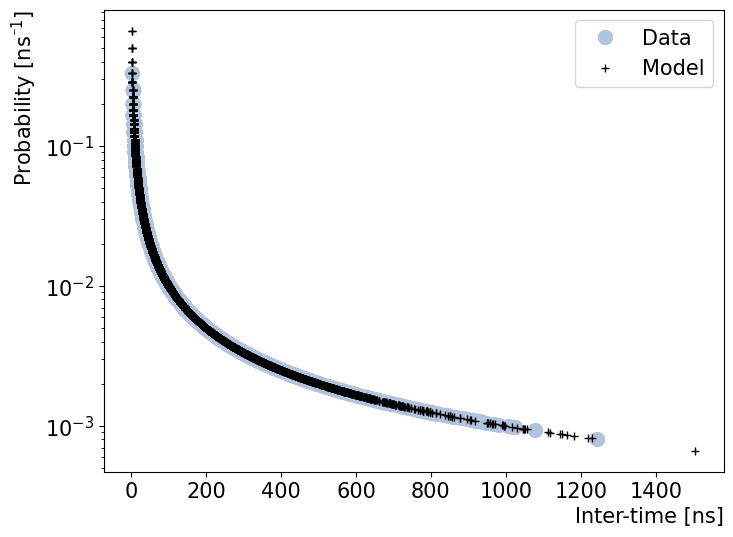

In [75]:
Inter_time_data = np.array(Inter_time_data)
Inter_time = np.array(I)*1e9

plt.figure(figsize=(8, 6))
plt.semilogy(Inter_time_data, 1/(Inter_time_data), ls=' ', marker='o', color='lightsteelblue', ms=10, label='Data')
plt.semilogy(Inter_time, 1/Inter_time, '+k', label='Model')
plt.xlabel("Inter-time [ns]", horizontalalignment='right', x=1.0, fontsize=15)
plt.ylabel("Probability [ns$^{⁻1}$]", horizontalalignment='right', y=1.0, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# plt.savefig('Figures/IT_prob_microfc.eps', format='eps', bbox_inches='tight', pad_inches=0)

plt.show()

In [7]:
# # Hamamatsu data

# X_45V_17C = [0.15085854, 0.21791761, 0.21791761, 0.28497668, 0.28497668,
#        0.35203575, 0.35203575, 0.41909481, 0.41909481, 0.48615388,
#        0.48615388, 0.55321295, 0.55321295, 0.62027202, 0.62027202,
#        0.68733108, 0.68733108, 0.75439015, 0.75439015, 0.82144922,
#        0.82144922, 0.88850829, 0.88850829, 0.95556736, 0.95556736,
#        1.02262642, 1.02262642, 1.08968549, 1.08968549, 1.15674456,
#        1.15674456, 1.22380363, 1.22380363, 1.29086269, 1.29086269,
#        1.35792176, 1.35792176, 1.42498083, 1.42498083, 1.4920399 ,
#        1.4920399 , 1.55909897, 1.55909897, 1.62615803, 1.62615803,
#        1.6932171 , 1.6932171 , 1.76027617, 1.76027617, 1.82733524,
#        1.82733524, 1.89439431, 1.89439431, 1.96145337, 1.96145337,
#        2.02851244, 2.02851244, 2.09557151, 2.09557151, 2.16263058,
#        2.16263058, 2.22968964, 2.22968964, 2.29674871, 2.29674871,
#        2.36380778, 2.36380778, 2.43086685, 2.43086685, 2.49792592,
#        2.49792592, 2.56498498, 2.56498498, 2.63204405, 2.63204405,
#        2.69910312, 2.69910312, 2.76616219, 2.76616219, 2.83322126,
#        2.83322126, 2.90028032, 2.90028032, 2.96733939, 2.96733939,
#        3.03439846, 3.03439846, 3.10145753, 3.10145753, 3.16851659,
#        3.16851659, 3.23557566, 3.23557566, 3.30263473, 3.30263473,
#        3.3696938 , 3.3696938 , 3.43675287, 3.43675287, 3.50381193,
#        3.50381193, 3.570871  , 3.570871  , 3.63793007, 3.63793007,
#        3.70498914, 3.70498914, 3.7720482 , 3.7720482 , 3.83910727,
#        3.83910727, 3.90616634, 3.90616634, 3.97322541, 3.97322541,
#        4.04028448, 4.04028448, 4.10734354, 4.10734354, 4.17440261,
#        4.17440261, 4.24146168, 4.24146168, 4.30852075, 4.30852075,
#        4.37557982, 4.37557982, 4.44263888, 4.44263888, 4.50969795,
#        4.50969795, 4.57675702, 4.57675702, 4.64381609, 4.64381609,
#        4.71087515, 4.71087515, 4.77793422, 4.77793422, 4.84499329,
#        4.84499329, 4.91205236, 4.91205236, 4.97911143, 4.97911143,
#        5.04617049, 5.04617049, 5.11322956, 5.11322956, 5.18028863,
#        5.18028863, 5.2473477 , 5.2473477 , 5.31440676, 5.31440676,
#        5.38146583, 5.38146583, 5.4485249 , 5.4485249 , 5.51558397,
#        5.51558397, 5.58264304, 5.58264304, 5.6497021 , 5.6497021 ,
#        5.71676117, 5.71676117, 5.78382024, 5.78382024, 5.85087931,
#        5.85087931, 5.91793838, 5.91793838, 5.98499744, 5.98499744,
#        6.05205651, 6.05205651, 6.11911558, 6.11911558, 6.18617465,
#        6.18617465, 6.25323371, 6.25323371, 6.32029278, 6.32029278,
#        6.38735185, 6.38735185, 6.45441092, 6.45441092, 6.52146999,
#        6.52146999, 6.58852905, 6.58852905, 6.65558812, 6.65558812,
#        6.72264719, 6.72264719, 6.78970626, 6.78970626, 6.85676533]

# Y_45V_17C = [241, 241, 128, 128,  45,  45,   2,   2,   0,   0,   3,   3,   4,
#          4,   2,   2,   5,   5,   5,   5,  37,  37,  37,  37,  77,  77,
#        159, 159,  68,  68,  29,  29,  23,  23,   4,   4,  10,  10,   1,
#          1,   3,   3,   8,   8,   6,   6,   5,   5,  12,  12,   9,   9,
#         11,  11,  32,  32,  20,  20,  26,  26,   4,   4,   2,   2,   2,
#          2,   0,   0,   3,   3,   1,   1,   0,   0,   4,   4,   2,   2,
#          4,   4,   3,   3,   4,   4,   3,   3,  12,  12,   2,   2,   3,
#          3,   1,   1,   1,   1,   0,   0,   2,   2,   0,   0,   1,   1,
#          2,   2,   0,   0,   0,   0,   0,   0,   4,   4,   2,   2,   2,
#          2,   2,   2,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,
#          1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
#          1,   0,   0,   2,   2,   0,   0,   0,   0,   0,   0,   0,   0,
#          0,   0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,
#          0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,
#          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
#          0,   0,   0,   1,   1]

In [24]:
# # MICROFC data

# X_32V_17C = [0.76981016, 0.85529231, 0.85529231, 0.94077446, 0.94077446,
#        1.0262566 , 1.0262566 , 1.11173875, 1.11173875, 1.1972209 ,
#        1.1972209 , 1.28270305, 1.28270305, 1.3681852 , 1.3681852 ,
#        1.45366735, 1.45366735, 1.53914949, 1.53914949, 1.62463164,
#        1.62463164, 1.71011379, 1.71011379, 1.79559594, 1.79559594,
#        1.88107809, 1.88107809, 1.96656024, 1.96656024, 2.05204238,
#        2.05204238, 2.13752453, 2.13752453, 2.22300668, 2.22300668,
#        2.30848883, 2.30848883, 2.39397098, 2.39397098, 2.47945313,
#        2.47945313, 2.56493528, 2.56493528, 2.65041742, 2.65041742,
#        2.73589957, 2.73589957, 2.82138172, 2.82138172, 2.90686387,
#        2.90686387, 2.99234602, 2.99234602, 3.07782817, 3.07782817,
#        3.16331031, 3.16331031, 3.24879246, 3.24879246, 3.33427461,
#        3.33427461, 3.41975676, 3.41975676, 3.50523891, 3.50523891,
#        3.59072106, 3.59072106, 3.6762032 , 3.6762032 , 3.76168535,
#        3.76168535, 3.8471675 , 3.8471675 , 3.93264965, 3.93264965,
#        4.0181318 , 4.0181318 , 4.10361395, 4.10361395, 4.1890961 ,
#        4.1890961 , 4.27457824, 4.27457824, 4.36006039, 4.36006039,
#        4.44554254, 4.44554254, 4.53102469, 4.53102469, 4.61650684,
#        4.61650684, 4.70198899, 4.70198899, 4.78747113, 4.78747113,
#        4.87295328, 4.87295328, 4.95843543, 4.95843543, 5.04391758,
#        5.04391758, 5.12939973, 5.12939973, 5.21488188, 5.21488188,
#        5.30036402, 5.30036402, 5.38584617, 5.38584617, 5.47132832,
#        5.47132832, 5.55681047, 5.55681047, 5.64229262, 5.64229262,
#        5.72777477, 5.72777477, 5.81325692, 5.81325692, 5.89873906,
#        5.89873906, 5.98422121, 5.98422121, 6.06970336, 6.06970336,
#        6.15518551, 6.15518551, 6.24066766, 6.24066766, 6.32614981,
#        6.32614981, 6.41163195, 6.41163195, 6.4971141 , 6.4971141 ,
#        6.58259625, 6.58259625, 6.6680784 , 6.6680784 , 6.75356055,
#        6.75356055, 6.8390427 , 6.8390427 , 6.92452484, 6.92452484,
#        7.01000699, 7.01000699, 7.09548914, 7.09548914, 7.18097129,
#        7.18097129, 7.26645344, 7.26645344, 7.35193559, 7.35193559,
#        7.43741773, 7.43741773, 7.52289988, 7.52289988, 7.60838203,
#        7.60838203, 7.69386418, 7.69386418, 7.77934633, 7.77934633,
#        7.86482848, 7.86482848, 7.95031063, 7.95031063, 8.03579277,
#        8.03579277, 8.12127492, 8.12127492, 8.20675707, 8.20675707,
#        8.29223922, 8.29223922, 8.37772137, 8.37772137, 8.46320352,
#        8.46320352, 8.54868566, 8.54868566, 8.63416781, 8.63416781,
#        8.71964996, 8.71964996, 8.80513211, 8.80513211, 8.89061426,
#        8.89061426, 8.97609641, 8.97609641, 9.06157855, 9.06157855,
#        9.1470607 , 9.1470607 , 9.23254285, 9.23254285, 9.318025  ]

# Y_32V_17C = [ 4,  4, 26, 26, 44, 44, 29, 29,  7,  7,  1,  1,  3,  3,  2,  2,  3,
#         3,  3,  3,  2,  2,  4,  4, 10, 10, 10, 10, 13, 13,  6,  6,  3,  3,
#         1,  1,  1,  1,  3,  3,  3,  3,  1,  1,  3,  3,  2,  2,  3,  3,  3,
#         3,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
#         0,  0,  4,  4,  2,  2,  1,  1,  4,  4,  1,  1,  1,  1,  1,  1,  1,
#         1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  3,  3,  0,  0,  0,  0,
#         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
#         1,  0,  0,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
#         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,
#         0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
#         0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
#         0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


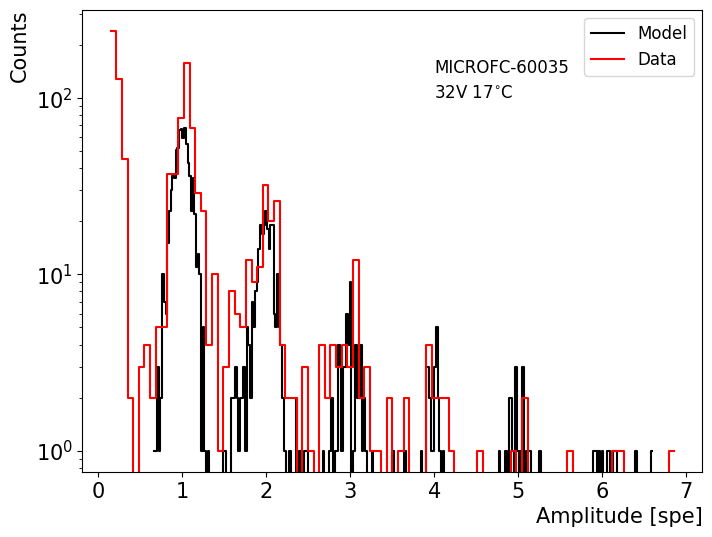

In [27]:
# plt.figure(figsize=(8, 6))
# plt.semilogy(X, Y,'k', label='Model')
# plt.plot(X_45V_17C , Y_45V_17C , 'r', label= 'Data')
# plt.xlabel("Amplitude [spe]", horizontalalignment='right', x=1.0, fontsize=15)
# plt.ylabel("Counts", horizontalalignment='right', y=1.0, fontsize=15)
# plt.text(4, 1.4e2, 'MICROFC-60035', fontsize=12) # S14160-6050HS, AFBR-S4N66P024M, MICROFC-60035
# plt.text(4, 1e2, '32V 17$^{\circ}$C', fontsize=12)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.legend(loc=1, fontsize=12)

# #plt.savefig('Figures/Peak_spectrum_comparison_microfc.eps', format='eps', bbox_inches='tight', pad_inches=0)

(0.0, 10.489226233530188)

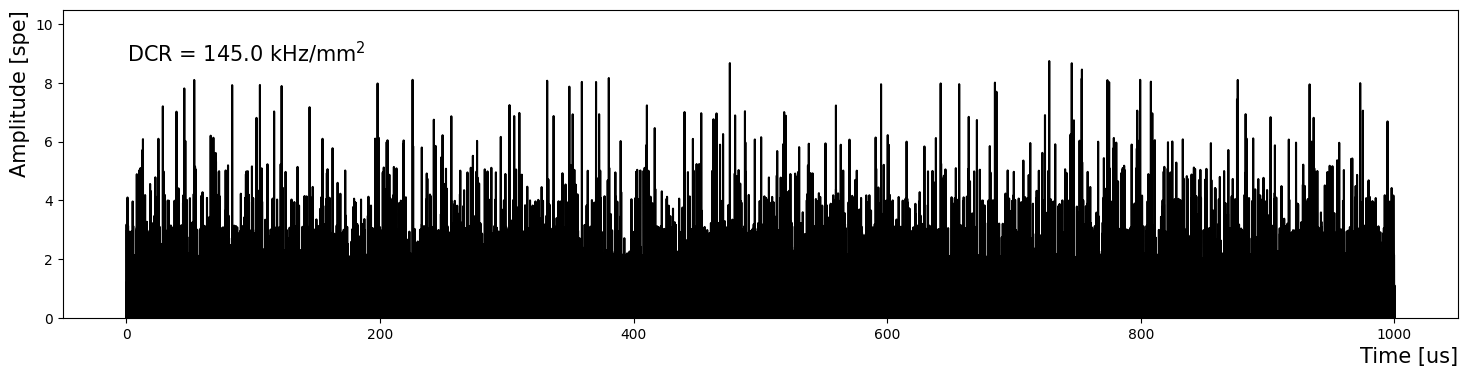

In [109]:
sum = np.sum(Channels, axis=0)

plt.figure(figsize=(18, 4))
# plt.plot(time[0:25000]/1e3, sum[0:25000], 'k')
plt.plot(time/1e3, sum, 'k')
plt.xlabel("Time [us]", horizontalalignment='right', x=1.0, fontsize=15)
plt.ylabel("Amplitude [spe]", horizontalalignment='right', y=1.0, fontsize=15)
plt.text(0.4,np.max(sum), "DCR = " + str(np.round(DCR/1e3,2)) + " kHz/mm$^2$", fontsize=15)
plt.ylim(0,1.2*np.max(sum))
# plt.xlim(0.2,5)

# plt.savefig('Figures/AFBR-S4N66P024M_Dark_Current_shortening.eps', format='eps', bbox_inches='tight', pad_inches=0)

## DCR vs. threshold

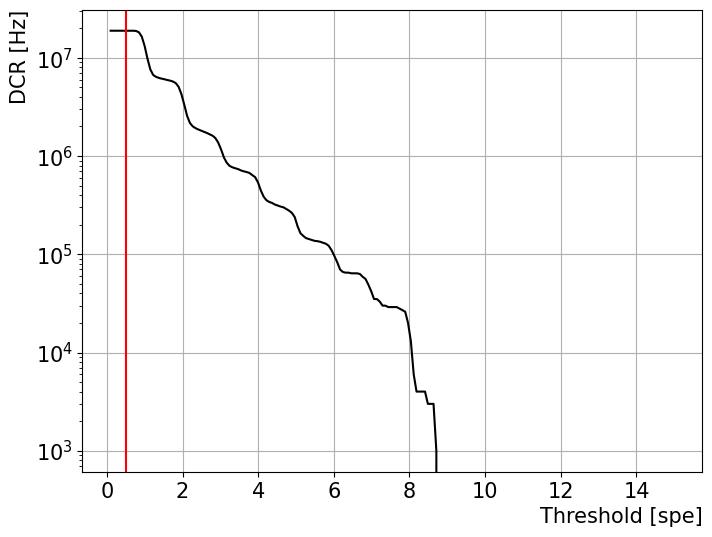

In [138]:
# SiPM DCR
V, B = sipm.DCR_threshold(sum, W, R, 0.1, 15, 200, plot=True)

## Data

In [6]:
Data_DCR_45V_25C = [29637500., 27158125., 21198125., 21198125.,  9038750.,  7056875.,
        7056875.,  6761250.,  6568750.,  6568750.,  6273750.,  5631250.,
        5631250.,  4257500.,  4257500.,  2703125.,  2303750.,  2303750.,
        2220000.,  2153125.,  2153125.,  2078125.,  1983750.,  1983750.,
        1832500.,  1832500.,  1542500.,  1174375.,  1174375.,  1000625.,
         954375.,   954375.,   933125.,   912500.,   912500.,   881875.,
         848750.,   848750.,   802500.,   802500.,   712500.,   604375.,
         604375.,   505625.,   463125.,   463125.,   444375.,   435000.,
         435000.,   428750.,   428750.,   421250.,   402500.,   402500.,
         376250.,   326250.,   326250.,   277500.,   247500.,   247500.,
         241875.,   241875.,   236250.,   227500.,   227500.,   220625.,
         210000.,   210000.,   190625.,   168125.,   168125.,   143750.,
         128125.,   128125.,   125625.,   125625.,   123125.,   119375.,
         119375.,   112500.,   105625.,   105625.,    95000.,    81875.,
          81875.,    75625.,    75625.,    71875.,    69375.,    69375.,
          67500.,    65000.,    65000.,    60000.,    55625.,    55625.,
          45625.,    45625.,    40625.,    39375.]

Data_Th_45V_25C = [0.        , 0.07117662, 0.14235325, 0.21352987, 0.2847065 ,
       0.35588312, 0.42705974, 0.49823637, 0.56941299, 0.64058961,
       0.71176624, 0.78294286, 0.85411949, 0.92529611, 0.99647273,
       1.06764936, 1.13882598, 1.21000261, 1.28117923, 1.35235585,
       1.42353248, 1.4947091 , 1.56588573, 1.63706235, 1.70823897,
       1.7794156 , 1.85059222, 1.92176884, 1.99294547, 2.06412209,
       2.13529872, 2.20647534, 2.27765196, 2.34882859, 2.42000521,
       2.49118184, 2.56235846, 2.63353508, 2.70471171, 2.77588833,
       2.84706495, 2.91824158, 2.9894182 , 3.06059483, 3.13177145,
       3.20294807, 3.2741247 , 3.34530132, 3.41647795, 3.48765457,
       3.55883119, 3.63000782, 3.70118444, 3.77236107, 3.84353769,
       3.91471431, 3.98589094, 4.05706756, 4.12824418, 4.19942081,
       4.27059743, 4.34177406, 4.41295068, 4.4841273 , 4.55530393,
       4.62648055, 4.69765718, 4.7688338 , 4.84001042, 4.91118705,
       4.98236367, 5.05354029, 5.12471692, 5.19589354, 5.26707017,
       5.33824679, 5.40942341, 5.48060004, 5.55177666, 5.62295329,
       5.69412991, 5.76530653, 5.83648316, 5.90765978, 5.9788364 ,
       6.05001303, 6.12118965, 6.19236628, 6.2635429 , 6.33471952,
       6.40589615, 6.47707277, 6.5482494 , 6.61942602, 6.69060264,
       6.76177927, 6.83295589, 6.90413252, 6.97530914, 7.04648576]

In [7]:
Data_DCR_42V_25C = [3.1770625e+07, 2.9720000e+07, 2.0971875e+07, 2.0971875e+07,
       6.8481250e+06, 5.7356250e+06, 5.7356250e+06, 5.5231250e+06,
       5.0381250e+06, 5.0381250e+06, 3.6643750e+06, 1.8775000e+06,
       1.8775000e+06, 1.4481250e+06, 1.4481250e+06, 1.3875000e+06,
       1.3281250e+06, 1.3281250e+06, 1.1881250e+06, 8.8250000e+05,
       8.8250000e+05, 5.5687500e+05, 4.7437500e+05, 4.7437500e+05,
       4.5000000e+05, 4.5000000e+05, 4.3250000e+05, 4.0687500e+05,
       4.0687500e+05, 3.5187500e+05, 2.7250000e+05, 2.7250000e+05,
       1.9500000e+05, 1.7562500e+05, 1.7562500e+05, 1.6562500e+05,
       1.5937500e+05, 1.5937500e+05, 1.5250000e+05, 1.5250000e+05,
       1.3562500e+05, 1.1125000e+05, 1.1125000e+05, 8.1250000e+04,
       7.1875000e+04, 7.1875000e+04, 7.0000000e+04, 6.7500000e+04,
       6.7500000e+04, 6.6875000e+04, 6.6875000e+04, 6.1250000e+04,
       4.8125000e+04, 4.8125000e+04, 3.8125000e+04, 3.1875000e+04,
       3.1875000e+04, 3.0000000e+04, 2.9375000e+04, 2.9375000e+04,
       2.8750000e+04, 2.8750000e+04, 2.5625000e+04, 2.3125000e+04,
       2.3125000e+04, 1.7500000e+04, 1.6875000e+04, 1.6875000e+04,
       1.6250000e+04, 1.6250000e+04, 1.6250000e+04, 1.5625000e+04,
       1.4375000e+04, 1.4375000e+04, 1.3750000e+04, 1.3750000e+04,
       1.0625000e+04, 9.3750000e+03, 9.3750000e+03, 9.3750000e+03,
       8.1250000e+03, 8.1250000e+03, 7.5000000e+03, 6.2500000e+03,
       6.2500000e+03, 4.3750000e+03, 4.3750000e+03, 3.7500000e+03,
       3.1250000e+03, 3.1250000e+03, 3.1250000e+03, 3.1250000e+03,
       3.1250000e+03, 3.1250000e+03, 1.8750000e+03, 1.8750000e+03,
       1.8750000e+03, 1.8750000e+03, 1.8750000e+03, 1.8750000e+03]

Data_Th_42V_25C = [0.        , 0.09816969, 0.19633938, 0.29450906, 0.39267875,
       0.49084844, 0.58901813, 0.68718782, 0.7853575 , 0.88352719,
       0.98169688, 1.07986657, 1.17803626, 1.27620595, 1.37437563,
       1.47254532, 1.57071501, 1.6688847 , 1.76705439, 1.86522407,
       1.96339376, 2.06156345, 2.15973314, 2.25790283, 2.35607251,
       2.4542422 , 2.55241189, 2.65058158, 2.74875127, 2.84692095,
       2.94509064, 3.04326033, 3.14143002, 3.23959971, 3.3377694 ,
       3.43593908, 3.53410877, 3.63227846, 3.73044815, 3.82861784,
       3.92678752, 4.02495721, 4.1231269 , 4.22129659, 4.31946628,
       4.41763596, 4.51580565, 4.61397534, 4.71214503, 4.81031472,
       4.90848441, 5.00665409, 5.10482378, 5.20299347, 5.30116316,
       5.39933285, 5.49750253, 5.59567222, 5.69384191, 5.7920116 ,
       5.89018129, 5.98835097, 6.08652066, 6.18469035, 6.28286004,
       6.38102973, 6.47919941, 6.5773691 , 6.67553879, 6.77370848,
       6.87187817, 6.97004786, 7.06821754, 7.16638723, 7.26455692,
       7.36272661, 7.4608963 , 7.55906598, 7.65723567, 7.75540536,
       7.85357505, 7.95174474, 8.04991442, 8.14808411, 8.2462538 ,
       8.34442349, 8.44259318, 8.54076286, 8.63893255, 8.73710224,
       8.83527193, 8.93344162, 9.03161131, 9.12978099, 9.22795068,
       9.32612037, 9.42429006, 9.52245975, 9.62062943, 9.71879912]

In [8]:
Data_DCR_45V_35C = [27995000., 25717500., 21760000., 21760000., 14660000., 11933750.,
       11933750., 11261875., 10764375., 10764375., 10039375.,  8912500.,
        8912500.,  7336875.,  7336875.,  5452500.,  4343750.,  4343750.,
        3963750.,  3775000.,  3775000.,  3598125.,  3366875.,  3366875.,
        3111250.,  3111250.,  2766250.,  2313125.,  2313125.,  1945625.,
        1741250.,  1741250.,  1655000.,  1595000.,  1595000.,  1539375.,
        1453750.,  1453750.,  1365625.,  1365625.,  1250625.,  1115000.,
        1115000.,   953125.,   851250.,   851250.,   786875.,   755625.,
         755625.,   725000.,   725000.,   691250.,   651250.,   651250.,
         617500.,   578750.,   578750.,   518125.,   458125.,   458125.,
         419375.,   419375.,   402500.,   390000.,   390000.,   378750.,
         355625.,   355625.,   330000.,   296875.,   296875.,   267500.,
         240625.,   240625.,   222500.,   222500.,   209375.,   201250.,
         201250.,   191875.,   182500.,   182500.,   168750.,   156250.,
         156250.,   141250.,   141250.,   132500.,   124375.,   124375.,
         115625.,   113125.,   113125.,   110625.,   101875.,   101875.,
          90000.,    90000.,    79375.,    71875.]

Data_Th_45V_35C = [0.        , 0.06967492, 0.13934983, 0.20902475, 0.27869967,
       0.34837458, 0.4180495 , 0.48772442, 0.55739933, 0.62707425,
       0.69674917, 0.76642408, 0.836099  , 0.90577391, 0.97544883,
       1.04512375, 1.11479866, 1.18447358, 1.2541485 , 1.32382341,
       1.39349833, 1.46317325, 1.53284816, 1.60252308, 1.672198  ,
       1.74187291, 1.81154783, 1.88122275, 1.95089766, 2.02057258,
       2.0902475 , 2.15992241, 2.22959733, 2.29927224, 2.36894716,
       2.43862208, 2.50829699, 2.57797191, 2.64764683, 2.71732174,
       2.78699666, 2.85667158, 2.92634649, 2.99602141, 3.06569633,
       3.13537124, 3.20504616, 3.27472108, 3.34439599, 3.41407091,
       3.48374583, 3.55342074, 3.62309566, 3.69277057, 3.76244549,
       3.83212041, 3.90179532, 3.97147024, 4.04114516, 4.11082007,
       4.18049499, 4.25016991, 4.31984482, 4.38951974, 4.45919466,
       4.52886957, 4.59854449, 4.66821941, 4.73789432, 4.80756924,
       4.87724416, 4.94691907, 5.01659399, 5.08626891, 5.15594382,
       5.22561874, 5.29529365, 5.36496857, 5.43464349, 5.5043184 ,
       5.57399332, 5.64366824, 5.71334315, 5.78301807, 5.85269299,
       5.9223679 , 5.99204282, 6.06171774, 6.13139265, 6.20106757,
       6.27074249, 6.3404174 , 6.41009232, 6.47976724, 6.54944215,
       6.61911707, 6.68879198, 6.7584669 , 6.82814182, 6.89781673]

In [9]:
Data_DCR_45V_15C = [32769375., 30993750., 25509375., 25509375.,  7840625.,  4185625.,
        4185625.,  3715625.,  3621875.,  3621875.,  3538125.,  3453750.,
        3453750.,  3287500.,  3287500.,  2858125.,  1987500.,  1987500.,
        1381875.,  1251250.,  1251250.,  1205625.,  1181250.,  1181250.,
        1154375.,  1154375.,  1113125.,  1070000.,  1070000.,  1002500.,
         870625.,   870625.,   656250.,   536250.,   536250.,   498125.,
         485000.,   485000.,   473750.,   473750.,   468125.,   458125.,
         458125.,   451875.,   433750.,   433750.,   406875.,   338750.,
         338750.,   265625.,   265625.,   238750.,   230000.,   230000.,
         228125.,   226875.,   226875.,   224375.,   218125.,   218125.,
         209375.,   209375.,   198750.,   173750.,   173750.,   140625.,
         129375.,   129375.,   125625.,   121250.,   121250.,   118125.,
         116250.,   116250.,   115625.,   115625.,   111250.,   105000.,
         105000.,    94375.,    80000.,    80000.,    74375.,    73125.,
          73125.,    72500.,    72500.,    71875.,    70000.,    70000.,
          66250.,    61875.,    61875.,    51250.,    45625.,    45625.,
          42500.,    42500.,    40000.,    37500.]

Data_Th_45V_15C = [0.        , 0.06724326, 0.13448652, 0.20172978, 0.26897305,
       0.33621631, 0.40345957, 0.47070283, 0.53794609, 0.60518935,
       0.67243262, 0.73967588, 0.80691914, 0.8741624 , 0.94140566,
       1.00864892, 1.07589218, 1.14313545, 1.21037871, 1.27762197,
       1.34486523, 1.41210849, 1.47935175, 1.54659502, 1.61383828,
       1.68108154, 1.7483248 , 1.81556806, 1.88281132, 1.95005458,
       2.01729785, 2.08454111, 2.15178437, 2.21902763, 2.28627089,
       2.35351415, 2.42075741, 2.48800068, 2.55524394, 2.6224872 ,
       2.68973046, 2.75697372, 2.82421698, 2.89146025, 2.95870351,
       3.02594677, 3.09319003, 3.16043329, 3.22767655, 3.29491981,
       3.36216308, 3.42940634, 3.4966496 , 3.56389286, 3.63113612,
       3.69837938, 3.76562265, 3.83286591, 3.90010917, 3.96735243,
       4.03459569, 4.10183895, 4.16908221, 4.23632548, 4.30356874,
       4.370812  , 4.43805526, 4.50529852, 4.57254178, 4.63978505,
       4.70702831, 4.77427157, 4.84151483, 4.90875809, 4.97600135,
       5.04324461, 5.11048788, 5.17773114, 5.2449744 , 5.31221766,
       5.37946092, 5.44670418, 5.51394745, 5.58119071, 5.64843397,
       5.71567723, 5.78292049, 5.85016375, 5.91740701, 5.98465028,
       6.05189354, 6.1191368 , 6.18638006, 6.25362332, 6.32086658,
       6.38810984, 6.45535311, 6.52259637, 6.58983963, 6.65708289]

In [10]:
Data_DCR_32V_17C = [6.0113125e+07, 1.2675625e+07, 6.8556250e+06, 6.0825000e+06,
       6.0512500e+06, 5.9900000e+06, 5.8862500e+06, 5.8012500e+06,
       5.4893750e+06, 5.1200000e+06, 3.4668750e+06, 2.1062500e+06,
       1.9887500e+06, 1.9168750e+06, 1.8918750e+06, 1.8331250e+06,
       1.7631250e+06, 1.7287500e+06, 1.5893750e+06, 1.4743750e+06,
       1.0968750e+06, 8.1812500e+05, 7.7500000e+05, 7.4375000e+05,
       7.2562500e+05, 7.0312500e+05, 6.6625000e+05, 6.4125000e+05,
       5.8687500e+05, 5.4437500e+05, 4.2625000e+05, 3.4750000e+05,
       3.2875000e+05, 3.1750000e+05, 3.1125000e+05, 2.9750000e+05,
       2.8312500e+05, 2.7312500e+05, 2.4937500e+05, 2.3812500e+05,
       1.9562500e+05, 1.6375000e+05, 1.5812500e+05, 1.4937500e+05,
       1.4562500e+05, 1.3375000e+05, 1.2375000e+05, 1.2062500e+05,
       1.0875000e+05, 1.0250000e+05, 9.0625000e+04, 7.6875000e+04,
       7.5625000e+04, 7.2500000e+04, 7.1875000e+04, 6.8750000e+04,
       6.5000000e+04, 6.1875000e+04, 5.6875000e+04, 5.1875000e+04,
       4.6250000e+04, 4.3125000e+04, 4.1250000e+04, 3.9375000e+04,
       3.8125000e+04, 3.5000000e+04, 3.5000000e+04, 3.2500000e+04,
       3.1250000e+04, 2.9375000e+04, 2.6875000e+04, 2.5625000e+04,
       2.4375000e+04, 2.1875000e+04, 2.1875000e+04, 2.0625000e+04,
       2.0625000e+04, 1.9375000e+04, 1.9375000e+04, 1.9375000e+04,
       1.7500000e+04, 1.5625000e+04, 1.5000000e+04, 1.3125000e+04,
       1.3125000e+04, 1.3125000e+04, 1.2500000e+04, 1.1250000e+04,
       1.1250000e+04, 1.0625000e+04, 1.0625000e+04, 1.0000000e+04,
       9.3750000e+03, 9.3750000e+03, 9.3750000e+03, 8.1250000e+03,
       8.1250000e+03, 6.8750000e+03, 5.6250000e+03, 5.6250000e+03]

Data_Th_32V_17C = [0.        , 0.09972335, 0.19944671, 0.29917006, 0.39889341,
       0.49861677, 0.59834012, 0.69806347, 0.79778683, 0.89751018,
       0.99723354, 1.09695689, 1.19668024, 1.2964036 , 1.39612695,
       1.4958503 , 1.59557366, 1.69529701, 1.79502036, 1.89474372,
       1.99446707, 2.09419042, 2.19391378, 2.29363713, 2.39336049,
       2.49308384, 2.59280719, 2.69253055, 2.7922539 , 2.89197725,
       2.99170061, 3.09142396, 3.19114731, 3.29087067, 3.39059402,
       3.49031737, 3.59004073, 3.68976408, 3.78948743, 3.88921079,
       3.98893414, 4.0886575 , 4.18838085, 4.2881042 , 4.38782756,
       4.48755091, 4.58727426, 4.68699762, 4.78672097, 4.88644432,
       4.98616768, 5.08589103, 5.18561438, 5.28533774, 5.38506109,
       5.48478445, 5.5845078 , 5.68423115, 5.78395451, 5.88367786,
       5.98340121, 6.08312457, 6.18284792, 6.28257127, 6.38229463,
       6.48201798, 6.58174133, 6.68146469, 6.78118804, 6.88091139,
       6.98063475, 7.0803581 , 7.18008146, 7.27980481, 7.37952816,
       7.47925152, 7.57897487, 7.67869822, 7.77842158, 7.87814493,
       7.97786828, 8.07759164, 8.17731499, 8.27703834, 8.3767617 ,
       8.47648505, 8.5762084 , 8.67593176, 8.77565511, 8.87537847,
       8.97510182, 9.07482517, 9.17454853, 9.27427188, 9.37399523,
       9.47371859, 9.57344194, 9.67316529, 9.77288865, 9.872612  ]

In [11]:
Data_DCR_30V_17C = [7.197250e+07, 1.303125e+07, 4.970000e+06, 3.882500e+06,
       3.865625e+06, 3.800000e+06, 3.305000e+06, 2.545625e+06,
       1.046875e+06, 8.450000e+05, 7.887500e+05, 7.543750e+05,
       7.306250e+05, 6.306250e+05, 5.168750e+05, 2.743750e+05,
       2.093750e+05, 2.012500e+05, 1.906250e+05, 1.831250e+05,
       1.556250e+05, 9.937500e+04, 8.000000e+04, 5.812500e+04,
       5.437500e+04, 4.937500e+04, 4.125000e+04, 3.750000e+04,
       2.937500e+04, 2.312500e+04, 2.000000e+04, 1.812500e+04,
       1.750000e+04, 1.500000e+04, 1.437500e+04, 9.375000e+03,
       5.625000e+03, 5.000000e+03, 4.375000e+03, 4.375000e+03,
       4.375000e+03, 4.375000e+03, 4.375000e+03, 2.500000e+03,
       2.500000e+03, 1.875000e+03, 6.250000e+02, 6.250000e+02,
       6.250000e+02, 6.250000e+02, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00]

Data_Th_30V_17C = [ 0.        ,  0.14294933,  0.28589866,  0.42884799,  0.57179732,
        0.71474666,  0.85769599,  1.00064532,  1.14359465,  1.28654398,
        1.42949331,  1.57244264,  1.71539197,  1.8583413 ,  2.00129064,
        2.14423997,  2.2871893 ,  2.43013863,  2.57308796,  2.71603729,
        2.85898662,  3.00193595,  3.14488528,  3.28783462,  3.43078395,
        3.57373328,  3.71668261,  3.85963194,  4.00258127,  4.1455306 ,
        4.28847993,  4.43142927,  4.5743786 ,  4.71732793,  4.86027726,
        5.00322659,  5.14617592,  5.28912525,  5.43207458,  5.57502391,
        5.71797325,  5.86092258,  6.00387191,  6.14682124,  6.28977057,
        6.4327199 ,  6.57566923,  6.71861856,  6.86156789,  7.00451723,
        7.14746656,  7.29041589,  7.43336522,  7.57631455,  7.71926388,
        7.86221321,  8.00516254,  8.14811187,  8.29106121,  8.43401054,
        8.57695987,  8.7199092 ,  8.86285853,  9.00580786,  9.14875719,
        9.29170652,  9.43465585,  9.57760519,  9.72055452,  9.86350385,
       10.00645318, 10.14940251, 10.29235184, 10.43530117, 10.5782505 ,
       10.72119983, 10.86414917, 11.0070985 , 11.15004783, 11.29299716,
       11.43594649, 11.57889582, 11.72184515, 11.86479448, 12.00774382,
       12.15069315, 12.29364248, 12.43659181, 12.57954114, 12.72249047,
       12.8654398 , 13.00838913, 13.15133846, 13.2942878 , 13.43723713,
       13.58018646, 13.72313579, 13.86608512, 14.00903445, 14.15198378]

In [12]:
Data_DCR_43V_17C = [7.2206875e+07, 3.6456250e+07, 9.6887500e+06, 8.3343750e+06,
       8.0643750e+06, 8.0193750e+06, 7.8506250e+06, 7.2568750e+06,
       6.5631250e+06, 3.8093750e+06, 2.3712500e+06, 1.3487500e+06,
       1.2168750e+06, 1.1937500e+06, 1.1406250e+06, 1.1112500e+06,
       1.0087500e+06, 7.8937500e+05, 6.2000000e+05, 3.2375000e+05,
       2.6875000e+05, 2.4562500e+05, 2.3000000e+05, 2.2312500e+05,
       2.0562500e+05, 1.9875000e+05, 1.5937500e+05, 1.0625000e+05,
       7.5000000e+04, 5.6875000e+04, 5.5000000e+04, 5.0000000e+04,
       4.6250000e+04, 4.3750000e+04, 3.9375000e+04, 3.6250000e+04,
       2.5000000e+04, 1.8750000e+04, 1.8125000e+04, 1.5625000e+04,
       1.5000000e+04, 1.5000000e+04, 1.4375000e+04, 1.4375000e+04,
       1.1875000e+04, 1.0000000e+04, 5.0000000e+03, 4.3750000e+03,
       3.7500000e+03, 3.1250000e+03, 3.1250000e+03, 3.1250000e+03,
       3.1250000e+03, 3.1250000e+03, 3.1250000e+03, 3.1250000e+03,
       2.5000000e+03, 1.8750000e+03, 1.8750000e+03, 1.8750000e+03,
       1.8750000e+03, 1.8750000e+03, 1.8750000e+03, 1.2500000e+03,
       1.2500000e+03, 6.2500000e+02, 6.2500000e+02, 6.2500000e+02,
       6.2500000e+02, 6.2500000e+02, 6.2500000e+02, 6.2500000e+02,
       6.2500000e+02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]

Data_Th_43V_17C = [ 0.        ,  0.11386409,  0.22772818,  0.34159227,  0.45545636,
        0.56932045,  0.68318455,  0.79704864,  0.91091273,  1.02477682,
        1.13864091,  1.252505  ,  1.36636909,  1.48023318,  1.59409727,
        1.70796136,  1.82182545,  1.93568954,  2.04955364,  2.16341773,
        2.27728182,  2.39114591,  2.50501   ,  2.61887409,  2.73273818,
        2.84660227,  2.96046636,  3.07433045,  3.18819454,  3.30205863,
        3.41592273,  3.52978682,  3.64365091,  3.757515  ,  3.87137909,
        3.98524318,  4.09910727,  4.21297136,  4.32683545,  4.44069954,
        4.55456363,  4.66842772,  4.78229182,  4.89615591,  5.01002   ,
        5.12388409,  5.23774818,  5.35161227,  5.46547636,  5.57934045,
        5.69320454,  5.80706863,  5.92093272,  6.03479681,  6.14866091,
        6.262525  ,  6.37638909,  6.49025318,  6.60411727,  6.71798136,
        6.83184545,  6.94570954,  7.05957363,  7.17343772,  7.28730181,
        7.4011659 ,  7.51503   ,  7.62889409,  7.74275818,  7.85662227,
        7.97048636,  8.08435045,  8.19821454,  8.31207863,  8.42594272,
        8.53980681,  8.6536709 ,  8.76753499,  8.88139909,  8.99526318,
        9.10912727,  9.22299136,  9.33685545,  9.45071954,  9.56458363,
        9.67844772,  9.79231181,  9.9061759 , 10.02003999, 10.13390408,
       10.24776818, 10.36163227, 10.47549636, 10.58936045, 10.70322454,
       10.81708863, 10.93095272, 11.04481681, 11.1586809 , 11.27254499]

In [13]:
Data_DCR_45V_17C = [5.2827500e+07, 2.8390625e+07, 1.3746875e+07, 1.2918750e+07,
       1.2580625e+07, 1.2509375e+07, 1.2354375e+07, 1.2126250e+07,
       1.1956250e+07, 1.1396250e+07, 1.0958125e+07, 9.4806250e+06,
       6.9631250e+06, 5.4112500e+06, 3.4625000e+06, 3.1893750e+06,
       3.0000000e+06, 2.8750000e+06, 2.8293750e+06, 2.7150000e+06,
       2.6643750e+06, 2.5331250e+06, 2.3462500e+06, 2.2275000e+06,
       1.8706250e+06, 1.6781250e+06, 1.2056250e+06, 9.6125000e+05,
       9.2437500e+05, 8.8500000e+05, 8.6812500e+05, 8.2750000e+05,
       7.9562500e+05, 7.7375000e+05, 7.2625000e+05, 6.9937500e+05,
       6.3625000e+05, 5.4187500e+05, 4.7875000e+05, 3.6250000e+05,
       3.1937500e+05, 2.9625000e+05, 2.8312500e+05, 2.7562500e+05,
       2.6125000e+05, 2.5625000e+05, 2.5000000e+05, 2.3937500e+05,
       2.2625000e+05, 2.0500000e+05, 1.8937500e+05, 1.6187500e+05,
       1.3625000e+05, 1.1375000e+05, 1.0375000e+05, 1.0062500e+05,
       9.8125000e+04, 9.5625000e+04, 9.1875000e+04, 8.7500000e+04,
       8.5000000e+04, 7.8750000e+04, 7.3750000e+04, 6.8750000e+04,
       6.0000000e+04, 5.5625000e+04, 4.5000000e+04, 4.2500000e+04,
       4.0000000e+04, 3.6250000e+04, 3.5000000e+04, 3.3125000e+04,
       3.3125000e+04, 3.1250000e+04, 2.9375000e+04, 2.8750000e+04,
       2.5625000e+04, 2.3750000e+04, 2.0625000e+04, 1.9375000e+04,
       1.8750000e+04, 1.8750000e+04, 1.7500000e+04, 1.5625000e+04,
       1.5000000e+04, 1.5000000e+04, 1.4375000e+04, 1.3125000e+04,
       1.1875000e+04, 8.1250000e+03, 8.1250000e+03, 8.1250000e+03,
       7.5000000e+03, 7.5000000e+03, 6.8750000e+03, 6.8750000e+03,
       5.6250000e+03, 5.6250000e+03, 5.0000000e+03, 4.3750000e+03]

Data_Th_45V_17C = [0.        , 0.07826699, 0.15653397, 0.23480096, 0.31306794,
       0.39133493, 0.46960191, 0.5478689 , 0.62613589, 0.70440287,
       0.78266986, 0.86093684, 0.93920383, 1.01747081, 1.0957378 ,
       1.17400478, 1.25227177, 1.33053876, 1.40880574, 1.48707273,
       1.56533971, 1.6436067 , 1.72187368, 1.80014067, 1.87840766,
       1.95667464, 2.03494163, 2.11320861, 2.1914756 , 2.26974258,
       2.34800957, 2.42627655, 2.50454354, 2.58281053, 2.66107751,
       2.7393445 , 2.81761148, 2.89587847, 2.97414545, 3.05241244,
       3.13067943, 3.20894641, 3.2872134 , 3.36548038, 3.44374737,
       3.52201435, 3.60028134, 3.67854832, 3.75681531, 3.8350823 ,
       3.91334928, 3.99161627, 4.06988325, 4.14815024, 4.22641722,
       4.30468421, 4.3829512 , 4.46121818, 4.53948517, 4.61775215,
       4.69601914, 4.77428612, 4.85255311, 4.93082009, 5.00908708,
       5.08735407, 5.16562105, 5.24388804, 5.32215502, 5.40042201,
       5.47868899, 5.55695598, 5.63522297, 5.71348995, 5.79175694,
       5.87002392, 5.94829091, 6.02655789, 6.10482488, 6.18309186,
       6.26135885, 6.33962584, 6.41789282, 6.49615981, 6.57442679,
       6.65269378, 6.73096076, 6.80922775, 6.88749474, 6.96576172,
       7.04402871, 7.12229569, 7.20056268, 7.27882966, 7.35709665,
       7.43536363, 7.51363062, 7.59189761, 7.67016459, 7.74843158]

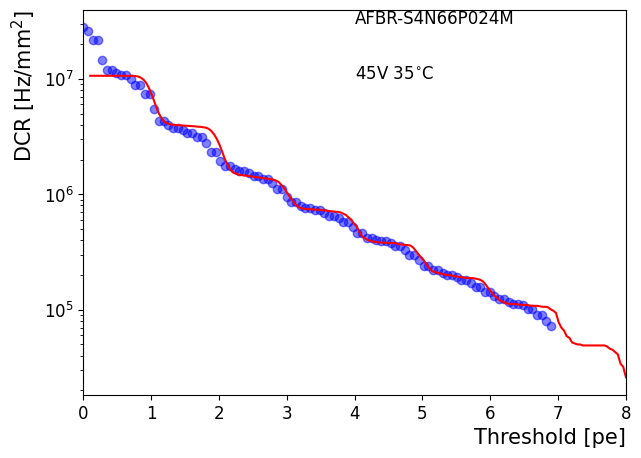

In [14]:
plt.figure(figsize=(7,5))
plt.semilogy(Data_Th_45V_35C, Data_DCR_45V_35C, 'ob', alpha=0.5, label='data')
plt.plot(B,V, 'r', label='model')
# plt.axvline(0.5, color='b', ls='--')
# plt.axvline(1.5, color='m', ls='--')
plt.xlabel("Threshold [pe]", horizontalalignment='right', x=1.0, fontsize=15)
plt.ylabel("DCR [Hz/mm$^2$]", horizontalalignment='right', y=1.0, fontsize=15)
plt.text(0.5*max(B), 3e7, 'AFBR-S4N66P024M', fontsize=12) # S14160-6050HS, AFBR-S4N66P024M, MICROFC-60035
plt.text(0.5*max(B), 1e7, '45V 35$^{\circ}$C', fontsize=12)
plt.xlim(0, max(B))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [124]:
V1, B1 = sipm.DCR_threshold_data(Channels[0,:], W, R, Data_Th_45V_35C, plot=False)

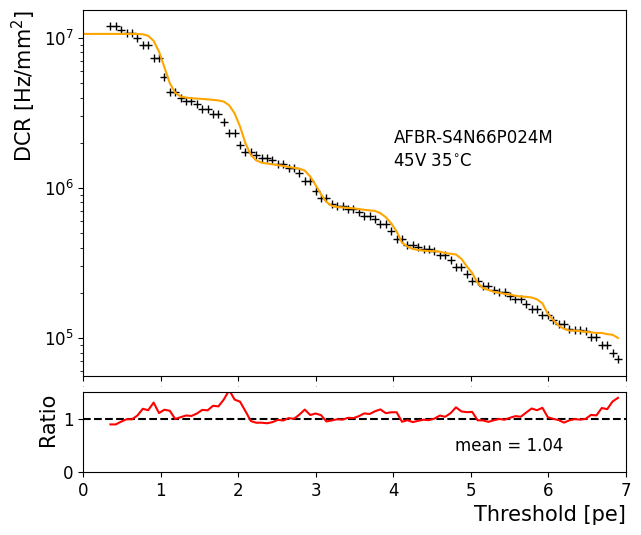

In [32]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(7,6))

gs = gridspec.GridSpec(5,1)

plt.subplot(gs[0:4,:])
plt.semilogy(Data_Th_45V_35C[5::], Data_DCR_45V_35C[5::], '+k', label='data')
plt.plot(B1,V1, color='orange', label='model')
plt.xlabel("Threshold [pe]", horizontalalignment='right', x=1.0, fontsize=15)
plt.ylabel("DCR [Hz$]", horizontalalignment='right', y=1.0, fontsize=15)
plt.text(0.5*max(B), 2e6, 'AFBR-S4N66P024M', fontsize=12) # S14160-6050HS, AFBR-S4N66P024M, MICROFC-60035
plt.text(0.5*max(B), 1.4e6, '45V 35$^{\circ}$C', fontsize=12)
plt.xlim(0, 7)
plt.xticks(fontsize=0)
plt.yticks(fontsize=12)

plt.subplot(gs[4,:])
plt.axhline(1, ls='--', color='k')
plt.plot(Data_Th_45V_35C[5::], V1[5::]/Data_DCR_45V_35C[5::], 'r')
plt.xlabel("Threshold [pe]", horizontalalignment='right', x=1.0, fontsize=15)
plt.ylabel("Ratio", horizontalalignment='right', y=1.0, fontsize=15)
plt.text(0.6*max(B), 0.4, 'mean = '+ str(np.round(np.mean(V1/Data_DCR_45V_35C),2)), fontsize=12)
plt.xlim(0, 7)
plt.ylim(0, 1.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# plt.savefig('Figures/AFBR_Model_DCR_Validation.eps', format='eps', bbox_inches='tight', pad_inches=0)

plt.show()

## Multi-pixel photo counter simulation

In [94]:
MPPC_TH_43V_17C= [ 0.        ,  0.26864389,  0.53728777,  0.80593166,  1.07457554,
        1.34321943,  1.61186331,  1.8805072 ,  2.14915109,  2.41779497,
        2.68643886,  2.95508274,  3.22372663,  3.49237051,  3.7610144 ,
        4.02965828,  4.29830217,  4.56694606,  4.83558994,  5.10423383,
        5.37287771,  5.6415216 ,  5.91016548,  6.17880937,  6.44745326,
        6.71609714,  6.98474103,  7.25338491,  7.5220288 ,  7.79067268,
        8.05931657,  8.32796046,  8.59660434,  8.86524823,  9.13389211,
        9.402536  ,  9.67117988,  9.93982377, 10.20846766, 10.47711154,
       10.74575543, 11.01439931, 11.2830432 , 11.55168708, 11.82033097,
       12.08897485, 12.35761874, 12.62626263, 12.89490651, 13.1635504 ,
       13.43219428, 13.70083817, 13.96948205, 14.23812594, 14.50676983,
       14.77541371, 15.0440576 , 15.31270148, 15.58134537, 15.84998925,
       16.11863314, 16.38727703, 16.65592091, 16.9245648 , 17.19320868,
       17.46185257, 17.73049645, 17.99914034, 18.26778423, 18.53642811,
       18.805072  , 19.07371588, 19.34235977, 19.61100365, 19.87964754,
       20.14829142, 20.41693531, 20.6855792 , 20.95422308, 21.22286697,
       21.49151085, 21.76015474, 22.02879862, 22.29744251, 22.5660864 ,
       22.83473028, 23.10337417, 23.37201805, 23.64066194, 23.90930582,
       24.17794971, 24.4465936 , 24.71523748, 24.98388137, 25.25252525,
       25.52116914, 25.78981302, 26.05845691, 26.3271008 , 26.59574468]


MPPC_DCR_43V_17C= [6.8099375e+07, 6.7739375e+07, 6.7739375e+07, 6.7739375e+07,
       6.2924375e+07, 6.2924375e+07, 6.2924375e+07, 3.7770000e+07,
       3.7770000e+07, 3.7770000e+07, 1.5051875e+07, 1.5051875e+07,
       1.5051875e+07, 1.0855625e+07, 1.0855625e+07, 1.0855625e+07,
       9.6175000e+06, 9.6175000e+06, 9.6175000e+06, 6.9906250e+06,
       6.9906250e+06, 6.9906250e+06, 4.2500000e+06, 4.2500000e+06,
       4.2500000e+06, 4.2500000e+06, 3.3000000e+06, 3.3000000e+06,
       3.3000000e+06, 2.9912500e+06, 2.9912500e+06, 2.9912500e+06,
       2.6031250e+06, 2.6031250e+06, 2.6031250e+06, 1.9075000e+06,
       1.9075000e+06, 1.9075000e+06, 1.3637500e+06, 1.3637500e+06,
       1.3637500e+06, 1.1800000e+06, 1.1800000e+06, 1.1800000e+06,
       1.0956250e+06, 1.0956250e+06, 1.0956250e+06, 9.4625000e+05,
       9.4625000e+05, 9.4625000e+05, 9.4625000e+05, 7.0312500e+05,
       7.0312500e+05, 7.0312500e+05, 5.4187500e+05, 5.4187500e+05,
       5.4187500e+05, 4.8875000e+05, 4.8875000e+05, 4.8875000e+05,
       4.4750000e+05, 4.4750000e+05, 4.4750000e+05, 3.8125000e+05,
       3.8125000e+05, 3.8125000e+05, 2.8937500e+05, 2.8937500e+05,
       2.8937500e+05, 2.3687500e+05, 2.3687500e+05, 2.3687500e+05,
       2.3687500e+05, 2.2250000e+05, 2.2250000e+05, 2.2250000e+05,
       2.0437500e+05, 2.0437500e+05, 2.0437500e+05, 1.6625000e+05,
       1.6625000e+05, 1.6625000e+05, 1.3250000e+05, 1.3250000e+05,
       1.3250000e+05, 1.1187500e+05, 1.1187500e+05, 1.1187500e+05,
       1.0437500e+05, 1.0437500e+05, 1.0437500e+05, 9.1875000e+04,
       9.1875000e+04, 9.1875000e+04, 7.3750000e+04, 7.3750000e+04,
       7.3750000e+04, 7.3750000e+04, 6.2500000e+04, 6.2500000e+04]

## Individual channel data

In [115]:
ch1_MPPC_TH_43V_18C= [0.        , 0.07615455, 0.15230909, 0.22846364, 0.30461819,
       0.38077273, 0.45692728, 0.53308183, 0.60923638, 0.68539092,
       0.76154547, 0.83770002, 0.91385456, 0.99000911, 1.06616366,
       1.1423182 , 1.21847275, 1.2946273 , 1.37078184, 1.44693639,
       1.52309094, 1.59924549, 1.67540003, 1.75155458, 1.82770913,
       1.90386367, 1.98001822, 2.05617277, 2.13232731, 2.20848186,
       2.28463641, 2.36079095, 2.4369455 , 2.51310005, 2.58925459,
       2.66540914, 2.74156369, 2.81771824, 2.89387278, 2.97002733,
       3.04618188, 3.12233642, 3.19849097, 3.27464552, 3.35080006,
       3.42695461, 3.50310916, 3.5792637 , 3.65541825, 3.7315728 ,
       3.80772735, 3.88388189, 3.96003644, 4.03619099, 4.11234553,
       4.18850008, 4.26465463, 4.34080917, 4.41696372, 4.49311827,
       4.56927281, 4.64542736, 4.72158191, 4.79773646, 4.873891  ,
       4.95004555, 5.0262001 , 5.10235464, 5.17850919, 5.25466374,
       5.33081828, 5.40697283, 5.48312738, 5.55928192, 5.63543647,
       5.71159102, 5.78774556, 5.86390011, 5.94005466, 6.01620921,
       6.09236375, 6.1685183 , 6.24467285, 6.32082739, 6.39698194,
       6.47313649, 6.54929103, 6.62544558, 6.70160013, 6.77775467,
       6.85390922, 6.93006377, 7.00621832, 7.08237286, 7.15852741,
       7.23468196, 7.3108365 , 7.38699105, 7.4631456 , 7.53930014]


ch1_MPPC_DCR_43V_18C= [5.18218750e+07, 2.81525000e+07, 1.45734375e+07, 1.45734375e+07,
       9.63437500e+06, 7.40875000e+06, 6.37968750e+06, 5.88000000e+06,
       5.88000000e+06, 5.59375000e+06, 5.31812500e+06, 4.88718750e+06,
       4.88718750e+06, 4.18593750e+06, 3.14656250e+06, 2.24531250e+06,
       2.24531250e+06, 1.81125000e+06, 1.65125000e+06, 1.57093750e+06,
       1.51843750e+06, 1.51843750e+06, 1.48437500e+06, 1.44406250e+06,
       1.39218750e+06, 1.39218750e+06, 1.33000000e+06, 1.20625000e+06,
       1.03125000e+06, 1.03125000e+06, 8.06562500e+05, 6.53750000e+05,
       5.83125000e+05, 5.52812500e+05, 5.52812500e+05, 5.36250000e+05,
       5.29375000e+05, 5.14687500e+05, 5.14687500e+05, 4.99687500e+05,
       4.82812500e+05, 4.58125000e+05, 4.58125000e+05, 4.12187500e+05,
       3.42500000e+05, 2.82187500e+05, 2.82187500e+05, 2.42812500e+05,
       2.26875000e+05, 2.16250000e+05, 2.11562500e+05, 2.11562500e+05,
       2.03125000e+05, 1.98750000e+05, 1.94062500e+05, 1.94062500e+05,
       1.83437500e+05, 1.66875000e+05, 1.47812500e+05, 1.47812500e+05,
       1.21562500e+05, 1.06562500e+05, 9.84375000e+04, 9.84375000e+04,
       9.21875000e+04, 9.03125000e+04, 8.84375000e+04, 8.62500000e+04,
       8.62500000e+04, 8.40625000e+04, 8.03125000e+04, 7.68750000e+04,
       7.68750000e+04, 7.21875000e+04, 6.40625000e+04, 5.43750000e+04,
       5.43750000e+04, 4.81250000e+04, 4.62500000e+04, 4.43750000e+04,
       4.31250000e+04, 4.31250000e+04, 4.21875000e+04, 4.06250000e+04,
       4.00000000e+04, 4.00000000e+04, 3.84375000e+04, 3.68750000e+04,
       3.37500000e+04, 3.37500000e+04, 2.93750000e+04, 2.53125000e+04,
       2.37500000e+04, 2.31250000e+04, 2.31250000e+04, 2.28125000e+04,
       2.25000000e+04, 2.25000000e+04, 2.25000000e+04, 2.21875000e+04]

In [117]:
ch2_MPPC_TH_43V_18C= [0.        , 0.06875137, 0.13750274, 0.20625412, 0.27500549,
       0.34375686, 0.41250823, 0.4812596 , 0.55001097, 0.61876235,
       0.68751372, 0.75626509, 0.82501646, 0.89376783, 0.96251921,
       1.03127058, 1.10002195, 1.16877332, 1.23752469, 1.30627606,
       1.37502744, 1.44377881, 1.51253018, 1.58128155, 1.65003292,
       1.7187843 , 1.78753567, 1.85628704, 1.92503841, 1.99378978,
       2.06254115, 2.13129253, 2.2000439 , 2.26879527, 2.33754664,
       2.40629801, 2.47504939, 2.54380076, 2.61255213, 2.6813035 ,
       2.75005487, 2.81880624, 2.88755762, 2.95630899, 3.02506036,
       3.09381173, 3.1625631 , 3.23131448, 3.30006585, 3.36881722,
       3.43756859, 3.50631996, 3.57507133, 3.64382271, 3.71257408,
       3.78132545, 3.85007682, 3.91882819, 3.98757957, 4.05633094,
       4.12508231, 4.19383368, 4.26258505, 4.33133642, 4.4000878 ,
       4.46883917, 4.53759054, 4.60634191, 4.67509328, 4.74384466,
       4.81259603, 4.8813474 , 4.95009877, 5.01885014, 5.08760151,
       5.15635289, 5.22510426, 5.29385563, 5.362607  , 5.43135837,
       5.50010975, 5.56886112, 5.63761249, 5.70636386, 5.77511523,
       5.8438666 , 5.91261798, 5.98136935, 6.05012072, 6.11887209,
       6.18762346, 6.25637484, 6.32512621, 6.39387758, 6.46262895,
       6.53138032, 6.60013169, 6.66888307, 6.73763444, 6.80638581]


ch2_MPPC_DCR_43V_18C= [5.18959375e+07, 2.73671875e+07, 1.41684375e+07, 1.41684375e+07,
       9.67281250e+06, 7.69312500e+06, 6.66031250e+06, 6.13750000e+06,
       6.13750000e+06, 5.81781250e+06, 5.57218750e+06, 5.30812500e+06,
       5.30812500e+06, 4.88593750e+06, 4.17031250e+06, 3.17125000e+06,
       3.17125000e+06, 2.31031250e+06, 1.86093750e+06, 1.69593750e+06,
       1.62656250e+06, 1.62656250e+06, 1.58125000e+06, 1.54406250e+06,
       1.51093750e+06, 1.51093750e+06, 1.47343750e+06, 1.41937500e+06,
       1.34218750e+06, 1.34218750e+06, 1.21312500e+06, 1.01031250e+06,
       7.97812500e+05, 6.68125000e+05, 6.68125000e+05, 6.15937500e+05,
       5.92812500e+05, 5.79062500e+05, 5.79062500e+05, 5.67500000e+05,
       5.60312500e+05, 5.48750000e+05, 5.48750000e+05, 5.38437500e+05,
       5.13437500e+05, 4.76562500e+05, 4.76562500e+05, 4.20312500e+05,
       3.41562500e+05, 2.81562500e+05, 2.55312500e+05, 2.55312500e+05,
       2.44687500e+05, 2.36875000e+05, 2.30000000e+05, 2.30000000e+05,
       2.24375000e+05, 2.18125000e+05, 2.13750000e+05, 2.13750000e+05,
       2.07187500e+05, 1.95000000e+05, 1.80000000e+05, 1.80000000e+05,
       1.56875000e+05, 1.30312500e+05, 1.14062500e+05, 1.08750000e+05,
       1.08750000e+05, 1.06562500e+05, 1.03125000e+05, 1.01250000e+05,
       1.01250000e+05, 9.96875000e+04, 9.75000000e+04, 9.43750000e+04,
       9.43750000e+04, 8.75000000e+04, 8.31250000e+04, 7.59375000e+04,
       6.68750000e+04, 6.68750000e+04, 5.93750000e+04, 5.46875000e+04,
       5.15625000e+04, 5.15625000e+04, 5.06250000e+04, 4.90625000e+04,
       4.81250000e+04, 4.81250000e+04, 4.78125000e+04, 4.59375000e+04,
       4.50000000e+04, 4.43750000e+04, 4.43750000e+04, 4.15625000e+04,
       3.84375000e+04, 3.34375000e+04, 3.34375000e+04, 3.00000000e+04]

In [120]:
ch3_MPPC_TH_43V_18C= [0.        , 0.0727399 , 0.14547979, 0.21821969, 0.29095958,
       0.36369948, 0.43643937, 0.50917927, 0.58191916, 0.65465906,
       0.72739895, 0.80013885, 0.87287874, 0.94561864, 1.01835853,
       1.09109843, 1.16383832, 1.23657822, 1.30931811, 1.38205801,
       1.45479791, 1.5275378 , 1.6002777 , 1.67301759, 1.74575749,
       1.81849738, 1.89123728, 1.96397717, 2.03671707, 2.10945696,
       2.18219686, 2.25493675, 2.32767665, 2.40041654, 2.47315644,
       2.54589633, 2.61863623, 2.69137612, 2.76411602, 2.83685592,
       2.90959581, 2.98233571, 3.0550756 , 3.1278155 , 3.20055539,
       3.27329529, 3.34603518, 3.41877508, 3.49151497, 3.56425487,
       3.63699476, 3.70973466, 3.78247455, 3.85521445, 3.92795434,
       4.00069424, 4.07343413, 4.14617403, 4.21891393, 4.29165382,
       4.36439372, 4.43713361, 4.50987351, 4.5826134 , 4.6553533 ,
       4.72809319, 4.80083309, 4.87357298, 4.94631288, 5.01905277,
       5.09179267, 5.16453256, 5.23727246, 5.31001235, 5.38275225,
       5.45549214, 5.52823204, 5.60097194, 5.67371183, 5.74645173,
       5.81919162, 5.89193152, 5.96467141, 6.03741131, 6.1101512 ,
       6.1828911 , 6.25563099, 6.32837089, 6.40111078, 6.47385068,
       6.54659057, 6.61933047, 6.69207036, 6.76481026, 6.83755015,
       6.91029005, 6.98302995, 7.05576984, 7.12850974, 7.20124963]


ch3_MPPC_DCR_43V_18C= [6.04306250e+07, 3.95790625e+07, 2.21050000e+07, 2.21050000e+07,
       1.32243750e+07, 9.81625000e+06, 8.36031250e+06, 7.57218750e+06,
       7.57218750e+06, 7.04281250e+06, 6.55875000e+06, 5.94593750e+06,
       5.94593750e+06, 5.10500000e+06, 4.11875000e+06, 3.20250000e+06,
       3.20250000e+06, 2.59281250e+06, 2.26625000e+06, 2.11750000e+06,
       2.04187500e+06, 2.04187500e+06, 1.96687500e+06, 1.89156250e+06,
       1.79593750e+06, 1.79593750e+06, 1.66843750e+06, 1.49812500e+06,
       1.28812500e+06, 1.28812500e+06, 1.06468750e+06, 9.05937500e+05,
       8.08125000e+05, 7.51250000e+05, 7.51250000e+05, 7.18437500e+05,
       6.95937500e+05, 6.75625000e+05, 6.75625000e+05, 6.47812500e+05,
       6.14062500e+05, 5.64687500e+05, 5.64687500e+05, 5.06562500e+05,
       4.40625000e+05, 3.81250000e+05, 3.81250000e+05, 3.37187500e+05,
       3.04062500e+05, 2.92500000e+05, 2.84687500e+05, 2.84687500e+05,
       2.77812500e+05, 2.65625000e+05, 2.54375000e+05, 2.54375000e+05,
       2.38125000e+05, 2.20000000e+05, 1.92500000e+05, 1.92500000e+05,
       1.69375000e+05, 1.48125000e+05, 1.34687500e+05, 1.34687500e+05,
       1.27500000e+05, 1.23750000e+05, 1.19375000e+05, 1.15000000e+05,
       1.15000000e+05, 1.11250000e+05, 1.05625000e+05, 9.87500000e+04,
       9.87500000e+04, 8.96875000e+04, 8.37500000e+04, 7.40625000e+04,
       7.40625000e+04, 6.78125000e+04, 6.34375000e+04, 6.03125000e+04,
       5.78125000e+04, 5.78125000e+04, 5.62500000e+04, 5.53125000e+04,
       5.28125000e+04, 5.28125000e+04, 5.00000000e+04, 4.71875000e+04,
       4.37500000e+04, 4.37500000e+04, 3.93750000e+04, 3.46875000e+04,
       3.18750000e+04, 2.87500000e+04, 2.87500000e+04, 2.81250000e+04,
       2.75000000e+04, 2.71875000e+04, 2.71875000e+04, 2.68750000e+04]

In [127]:
ch4_MPPC_TH_43V_18C= [0.        , 0.08110514, 0.16221028, 0.24331542, 0.32442056,
       0.40552569, 0.48663083, 0.56773597, 0.64884111, 0.72994625,
       0.81105139, 0.89215653, 0.97326167, 1.05436681, 1.13547194,
       1.21657708, 1.29768222, 1.37878736, 1.4598925 , 1.54099764,
       1.62210278, 1.70320792, 1.78431306, 1.86541819, 1.94652333,
       2.02762847, 2.10873361, 2.18983875, 2.27094389, 2.35204903,
       2.43315417, 2.51425931, 2.59536444, 2.67646958, 2.75757472,
       2.83867986, 2.919785  , 3.00089014, 3.08199528, 3.16310042,
       3.24420556, 3.32531069, 3.40641583, 3.48752097, 3.56862611,
       3.64973125, 3.73083639, 3.81194153, 3.89304667, 3.97415181,
       4.05525694, 4.13636208, 4.21746722, 4.29857236, 4.3796775 ,
       4.46078264, 4.54188778, 4.62299292, 4.70409806, 4.78520319,
       4.86630833, 4.94741347, 5.02851861, 5.10962375, 5.19072889,
       5.27183403, 5.35293917, 5.43404431, 5.51514944, 5.59625458,
       5.67735972, 5.75846486, 5.83957   , 5.92067514, 6.00178028,
       6.08288542, 6.16399056, 6.24509569, 6.32620083, 6.40730597,
       6.48841111, 6.56951625, 6.65062139, 6.73172653, 6.81283167,
       6.89393681, 6.97504194, 7.05614708, 7.13725222, 7.21835736,
       7.2994625 , 7.38056764, 7.46167278, 7.54277792, 7.62388306,
       7.70498819, 7.78609333, 7.86719847, 7.94830361, 8.02940875]


ch4_MPPC_DCR_43V_18C= [6.72821875e+07, 4.97721875e+07, 3.09496875e+07, 3.09496875e+07,
       1.84734375e+07, 1.24284375e+07, 9.80593750e+06, 8.46843750e+06,
       8.46843750e+06, 7.64156250e+06, 7.02187500e+06, 6.39218750e+06,
       6.39218750e+06, 5.60687500e+06, 4.64968750e+06, 3.71406250e+06,
       3.71406250e+06, 2.96437500e+06, 2.49968750e+06, 2.25906250e+06,
       2.12125000e+06, 2.12125000e+06, 2.03531250e+06, 1.96343750e+06,
       1.86812500e+06, 1.86812500e+06, 1.75906250e+06, 1.60187500e+06,
       1.41031250e+06, 1.41031250e+06, 1.19343750e+06, 1.01531250e+06,
       8.85000000e+05, 8.02187500e+05, 8.02187500e+05, 7.64375000e+05,
       7.35937500e+05, 7.15000000e+05, 7.15000000e+05, 6.88750000e+05,
       6.60312500e+05, 6.15312500e+05, 6.15312500e+05, 5.67812500e+05,
       4.98750000e+05, 4.33750000e+05, 4.33750000e+05, 3.86250000e+05,
       3.40000000e+05, 3.16875000e+05, 3.04375000e+05, 3.04375000e+05,
       2.94687500e+05, 2.85625000e+05, 2.74687500e+05, 2.74687500e+05,
       2.65312500e+05, 2.46250000e+05, 2.25312500e+05, 2.25312500e+05,
       1.98750000e+05, 1.75312500e+05, 1.53125000e+05, 1.53125000e+05,
       1.40000000e+05, 1.33125000e+05, 1.28750000e+05, 1.25937500e+05,
       1.25937500e+05, 1.23437500e+05, 1.20000000e+05, 1.15312500e+05,
       1.15312500e+05, 1.06875000e+05, 9.78125000e+04, 9.00000000e+04,
       9.00000000e+04, 8.03125000e+04, 7.34375000e+04, 6.43750000e+04,
       6.12500000e+04, 6.12500000e+04, 5.81250000e+04, 5.65625000e+04,
       5.40625000e+04, 5.40625000e+04, 5.18750000e+04, 4.96875000e+04,
       4.68750000e+04, 4.68750000e+04, 4.50000000e+04, 4.31250000e+04,
       3.87500000e+04, 3.62500000e+04, 3.62500000e+04, 3.15625000e+04,
       3.06250000e+04, 2.90625000e+04, 2.90625000e+04, 2.81250000e+04]

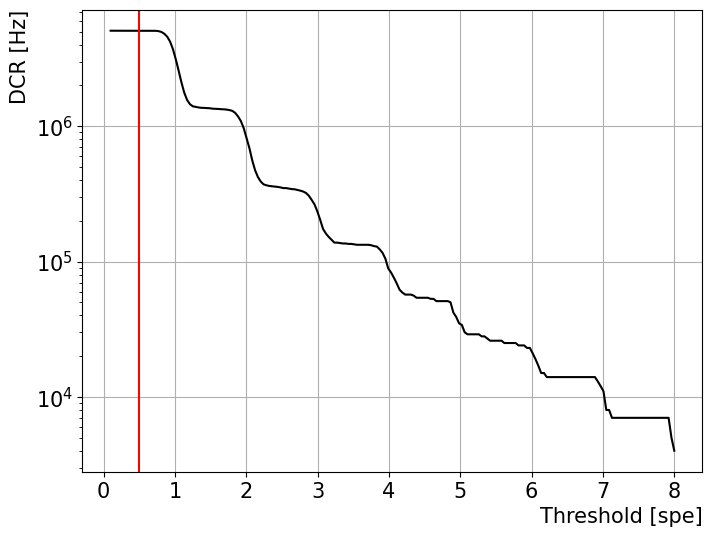

In [140]:
# 8x8 MPPC DCR
V_mppc, B_mppc = sipm.DCR_threshold(Channels[0,:], W, R, 0.1, 8, 200, plot=True)

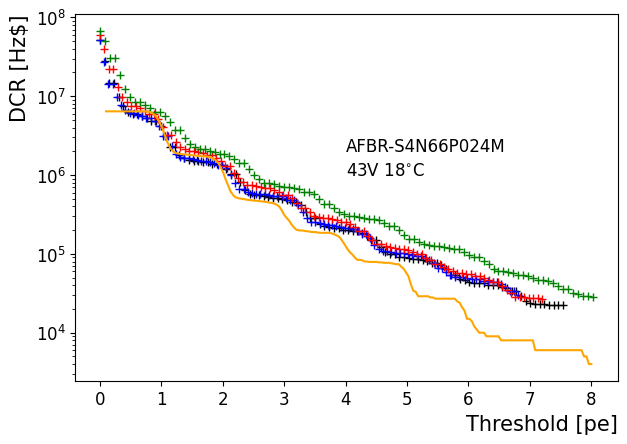

In [129]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(7,6))

gs = gridspec.GridSpec(5,1)

plt.subplot(gs[0:4,:])
plt.semilogy(ch1_MPPC_TH_43V_18C, ch1_MPPC_DCR_43V_18C, '+k', label='data')
plt.semilogy(ch2_MPPC_TH_43V_18C, ch2_MPPC_DCR_43V_18C, '+b', label='data')
plt.semilogy(ch3_MPPC_TH_43V_18C, ch3_MPPC_DCR_43V_18C, '+r', label='data')
plt.semilogy(ch4_MPPC_TH_43V_18C, ch4_MPPC_DCR_43V_18C, '+g', label='data')
plt.plot(B_mppc,V_mppc, color='orange', label='model')
plt.xlabel("Threshold [pe]", horizontalalignment='right', x=1.0, fontsize=15)
plt.ylabel("DCR [Hz$]", horizontalalignment='right', y=1.0, fontsize=15)
plt.text(0.5*max(B_mppc), 2e6, 'AFBR-S4N66P024M', fontsize=12) # S14160-6050HS, AFBR-S4N66P024M, MICROFC-60035
plt.text(0.5*max(B_mppc), 1e6, '43V 18$^{\circ}$C', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()

# New data dark conditions

In [130]:
ch1_MPPC_TH_43V_19C= [0.        , 0.09691991, 0.19383982, 0.29075973, 0.38767964,
       0.48459955, 0.58151947, 0.67843938, 0.77535929, 0.8722792 ,
       0.96919911, 1.06611902, 1.16303893, 1.25995884, 1.35687875,
       1.45379866, 1.55071857, 1.64763849, 1.7445584 , 1.84147831,
       1.93839822, 2.03531813, 2.13223804, 2.22915795, 2.32607786,
       2.42299777, 2.51991768, 2.61683759, 2.71375751, 2.81067742,
       2.90759733, 3.00451724, 3.10143715, 3.19835706, 3.29527697,
       3.39219688, 3.48911679, 3.5860367 , 3.68295661, 3.77987653,
       3.87679644, 3.97371635, 4.07063626, 4.16755617, 4.26447608,
       4.36139599, 4.4583159 , 4.55523581, 4.65215572, 4.74907563,
       4.84599555, 4.94291546, 5.03983537, 5.13675528, 5.23367519,
       5.3305951 , 5.42751501, 5.52443492, 5.62135483, 5.71827474,
       5.81519465, 5.91211457, 6.00903448, 6.10595439, 6.2028743 ,
       6.29979421, 6.39671412, 6.49363403, 6.59055394, 6.68747385,
       6.78439376, 6.88131367, 6.97823359, 7.0751535 , 7.17207341,
       7.26899332, 7.36591323, 7.46283314, 7.55975305, 7.65667296,
       7.75359287, 7.85051278, 7.94743269, 8.04435261, 8.14127252,
       8.23819243, 8.33511234, 8.43203225, 8.52895216, 8.62587207,
       8.72279198, 8.81971189, 8.9166318 , 9.01355171, 9.11047163,
       9.20739154, 9.30431145, 9.40123136, 9.49815127, 9.59507118]


ch1_MPPC_DCR_43V_19C= [7.50981250e+07, 7.03465625e+07, 5.65359375e+07, 2.93265625e+07,
       1.25818750e+07, 1.25818750e+07, 7.39625000e+06, 5.76781250e+06,
       4.93500000e+06, 4.93500000e+06, 4.12937500e+06, 3.12562500e+06,
       2.19406250e+06, 2.19406250e+06, 1.61687500e+06, 1.38781250e+06,
       1.29062500e+06, 1.21156250e+06, 1.21156250e+06, 1.11187500e+06,
       9.47187500e+05, 7.46250000e+05, 7.46250000e+05, 5.81875000e+05,
       4.94687500e+05, 4.60937500e+05, 4.60937500e+05, 4.34375000e+05,
       4.10625000e+05, 3.70312500e+05, 3.19687500e+05, 3.19687500e+05,
       2.57812500e+05, 2.10625000e+05, 1.90625000e+05, 1.90625000e+05,
       1.79687500e+05, 1.68750000e+05, 1.60625000e+05, 1.60625000e+05,
       1.45312500e+05, 1.25000000e+05, 1.04687500e+05, 1.04687500e+05,
       8.71875000e+04, 7.84375000e+04, 7.62500000e+04, 7.37500000e+04,
       7.37500000e+04, 6.87500000e+04, 6.21875000e+04, 5.50000000e+04,
       5.50000000e+04, 4.81250000e+04, 4.43750000e+04, 4.06250000e+04,
       4.06250000e+04, 3.87500000e+04, 3.68750000e+04, 3.53125000e+04,
       3.31250000e+04, 3.31250000e+04, 2.96875000e+04, 2.56250000e+04,
       2.18750000e+04, 2.18750000e+04, 2.00000000e+04, 1.84375000e+04,
       1.78125000e+04, 1.78125000e+04, 1.75000000e+04, 1.65625000e+04,
       1.46875000e+04, 1.46875000e+04, 1.37500000e+04, 1.31250000e+04,
       1.28125000e+04, 1.18750000e+04, 1.18750000e+04, 1.15625000e+04,
       1.09375000e+04, 9.37500000e+03, 9.37500000e+03, 8.43750000e+03,
       7.81250000e+03, 5.62500000e+03, 5.62500000e+03, 4.68750000e+03,
       4.37500000e+03, 4.06250000e+03, 4.06250000e+03, 4.06250000e+03,
       4.06250000e+03, 3.75000000e+03, 3.75000000e+03, 3.75000000e+03,
       3.43750000e+03, 2.18750000e+03, 1.87500000e+03, 1.87500000e+03]

In [132]:
ch2_MPPC_TH_43V_19C= [0.        , 0.04845996, 0.09691991, 0.14537987, 0.19383982,
       0.24229978, 0.29075973, 0.33921969, 0.38767964, 0.4361396 ,
       0.48459955, 0.53305951, 0.58151947, 0.62997942, 0.67843938,
       0.72689933, 0.77535929, 0.82381924, 0.8722792 , 0.92073915,
       0.96919911, 1.01765906, 1.06611902, 1.11457898, 1.16303893,
       1.21149889, 1.25995884, 1.3084188 , 1.35687875, 1.40533871,
       1.45379866, 1.50225862, 1.55071857, 1.59917853, 1.64763849,
       1.69609844, 1.7445584 , 1.79301835, 1.84147831, 1.88993826,
       1.93839822, 1.98685817, 2.03531813, 2.08377808, 2.13223804,
       2.180698  , 2.22915795, 2.27761791, 2.32607786, 2.37453782,
       2.42299777, 2.47145773, 2.51991768, 2.56837764, 2.61683759,
       2.66529755, 2.71375751, 2.76221746, 2.81067742, 2.85913737,
       2.90759733, 2.95605728, 3.00451724, 3.05297719, 3.10143715,
       3.1498971 , 3.19835706, 3.24681702, 3.29527697, 3.34373693,
       3.39219688, 3.44065684, 3.48911679, 3.53757675, 3.5860367 ,
       3.63449666, 3.68295661, 3.73141657, 3.77987653, 3.82833648,
       3.87679644, 3.92525639, 3.97371635, 4.0221763 , 4.07063626,
       4.11909621, 4.16755617, 4.21601612, 4.26447608, 4.31293604,
       4.36139599, 4.40985595, 4.4583159 , 4.50677586, 4.55523581,
       4.60369577, 4.65215572, 4.70061568, 4.74907563, 4.79753559]


ch2_MPPC_DCR_43V_19C= [60115000. , 55227500. , 55227500. , 37525000. , 37525000. ,
       37525000. , 12676250. , 12676250. ,  6851250. ,  6851250. ,
        6851250. ,  5251250. ,  5251250. ,  5251250. ,  4602500. ,
        4602500. ,  4293125. ,  4293125. ,  4293125. ,  3964062.5,
        3964062.5,  3294375. ,  3294375. ,  3294375. ,  2145312.5,
        2145312.5,  2145312.5,  1422500. ,  1422500. ,  1252812.5,
        1252812.5,  1252812.5,  1192187.5,  1192187.5,  1153125. ,
        1153125. ,  1153125. ,  1118125. ,  1118125. ,  1118125. ,
        1059062.5,  1059062.5,   942812.5,   942812.5,   942812.5,
         710000. ,   710000. ,   513750. ,   513750. ,   513750. ,
         453750. ,   453750. ,   453750. ,   434062.5,   434062.5,
         423125. ,   423125. ,   423125. ,   410937.5,   410937.5,
         392500. ,   392500. ,   392500. ,   360937.5,   360937.5,
         360937.5,   300000. ,   300000. ,   221250. ,   221250. ,
         221250. ,   187812.5,   187812.5,   187812.5,   177500. ,
         177500. ,   175312.5,   175312.5,   175312.5,   171562.5,
         171562.5,   167187.5,   167187.5,   167187.5,   158125. ,
         158125. ,   158125. ,   140000. ,   140000. ,   113125. ,
         113125. ,   113125. ,    96562.5,    96562.5,    87812.5,
          87812.5,    87812.5,    85312.5,    85312.5,    85312.5]

In [134]:
ch3_MPPC_TH_43V_19C= [0.        , 0.04921127, 0.09842254, 0.14763381, 0.19684508,
       0.24605635, 0.29526762, 0.34447889, 0.39369016, 0.44290143,
       0.4921127 , 0.54132397, 0.59053524, 0.63974651, 0.68895778,
       0.73816905, 0.78738032, 0.83659159, 0.88580286, 0.93501413,
       0.9842254 , 1.03343667, 1.08264794, 1.13185921, 1.18107048,
       1.23028175, 1.27949302, 1.32870429, 1.37791556, 1.42712683,
       1.4763381 , 1.52554937, 1.57476064, 1.62397191, 1.67318318,
       1.72239445, 1.77160572, 1.82081699, 1.87002826, 1.91923953,
       1.9684508 , 2.01766207, 2.06687334, 2.11608461, 2.16529588,
       2.21450715, 2.26371842, 2.31292969, 2.36214096, 2.41135223,
       2.4605635 , 2.50977477, 2.55898604, 2.60819731, 2.65740858,
       2.70661985, 2.75583112, 2.80504239, 2.85425366, 2.90346493,
       2.9526762 , 3.00188747, 3.05109874, 3.10031001, 3.14952128,
       3.19873255, 3.24794382, 3.29715509, 3.34636636, 3.39557763,
       3.4447889 , 3.49400017, 3.54321144, 3.59242271, 3.64163398,
       3.69084525, 3.74005652, 3.78926779, 3.83847906, 3.88769033,
       3.9369016 , 3.98611287, 4.03532414, 4.08453541, 4.13374668,
       4.18295794, 4.23216921, 4.28138048, 4.33059175, 4.37980302,
       4.42901429, 4.47822556, 4.52743683, 4.5766481 , 4.62585937,
       4.67507064, 4.72428191, 4.77349318, 4.82270445, 4.87191572]


ch3_MPPC_DCR_43V_19C= [62724999.99999999, 60286388.88888888, 60286388.88888888,
       52784999.99999999, 52784999.99999999, 52784999.99999999,
       21851388.88888889, 21851388.88888889,  7486666.66666667,
        7486666.66666667,  7486666.66666667,  4985000.        ,
        4985000.        ,  4985000.        ,  4414444.44444444,
        4414444.44444444,  4162222.22222222,  4162222.22222222,
        4162222.22222222,  3928888.88888889,  3928888.88888889,
        3476666.66666667,  3476666.66666667,  3476666.66666667,
        2528611.11111111,  2528611.11111111,  2528611.11111111,
        1515000.        ,  1515000.        ,  1163333.33333333,
        1163333.33333333,  1163333.33333333,  1098055.55555556,
        1098055.55555556,  1066111.11111111,  1066111.11111111,
        1066111.11111111,  1025277.77777778,  1025277.77777778,
        1025277.77777778,   963611.11111111,   963611.11111111,
         805555.55555556,   805555.55555556,   805555.55555556,
         561944.44444444,   561944.44444444,   432777.77777778,
         432777.77777778,   432777.77777778,   399166.66666667,
         399166.66666667,   399166.66666667,   386944.44444444,
         386944.44444444,   376666.66666667,   376666.66666667,
         376666.66666667,   361666.66666667,   361666.66666667,
         334166.66666667,   334166.66666667,   334166.66666667,
         279722.22222222,   279722.22222222,   279722.22222222,
         208055.55555556,   208055.55555556,   171944.44444444,
         171944.44444444,   171944.44444444,   160555.55555556,
         160555.55555556,   160555.55555556,   158333.33333333,
         158333.33333333,   154722.22222222,   154722.22222222,
         154722.22222222,   149166.66666667,   149166.66666667,
         136944.44444444,   136944.44444444,   136944.44444444,
         115833.33333333,   115833.33333333,   115833.33333333,
          87222.22222222,    87222.22222222,    74444.44444444,
          74444.44444444,    74444.44444444,    71944.44444444,
          71944.44444444,    68611.11111111,    68611.11111111,
          68611.11111111,    65833.33333333,    65833.33333333,
          65833.33333333]

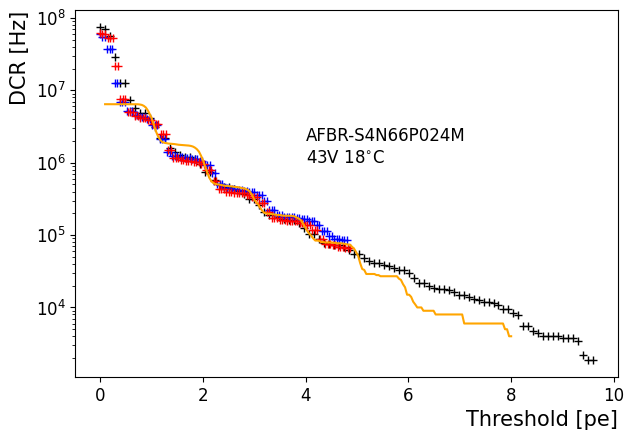

In [139]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(7,6))

gs = gridspec.GridSpec(5,1)

plt.subplot(gs[0:4,:])
plt.semilogy(ch1_MPPC_TH_43V_19C, ch1_MPPC_DCR_43V_19C, '+k', label='data')
plt.semilogy(ch2_MPPC_TH_43V_19C, ch2_MPPC_DCR_43V_19C, '+b', label='data')
plt.semilogy(ch3_MPPC_TH_43V_19C, ch3_MPPC_DCR_43V_19C, '+r', label='data')
# plt.semilogy(ch4_MPPC_TH_43V_18C, ch4_MPPC_DCR_43V_18C, '+g', label='data')
plt.plot(B_mppc,V_mppc, color='orange', label='model')
plt.xlabel("Threshold [pe]", horizontalalignment='right', x=1.0, fontsize=15)
plt.ylabel("DCR [Hz]", horizontalalignment='right', y=1.0, fontsize=15)
plt.text(0.5*max(B_mppc), 2e6, 'AFBR-S4N66P024M', fontsize=12) # S14160-6050HS, AFBR-S4N66P024M, MICROFC-60035
plt.text(0.5*max(B_mppc), 1e6, '43V 18$^{\circ}$C', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()